In [9]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from termcolor import colored

In [10]:
data = pd.read_csv("dataset/data.csv")

In [11]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [12]:
data.shape

(569, 33)

In [13]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
data.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [15]:
data.shape

(569, 31)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [17]:
# sns.pairplot(data)
# plt.show()

In [18]:
data.sample()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
203         M        13.81         23.75           91.56      597.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
203           0.1323            0.1768          0.1558              0.09176   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
203         0.2251  ...          19.2          41.85            128.5   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
203      1153.0            0.2226             0.5209           0.4646   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
203                0.2013          0.4432                   0.1086  

[1 rows x 31 columns]

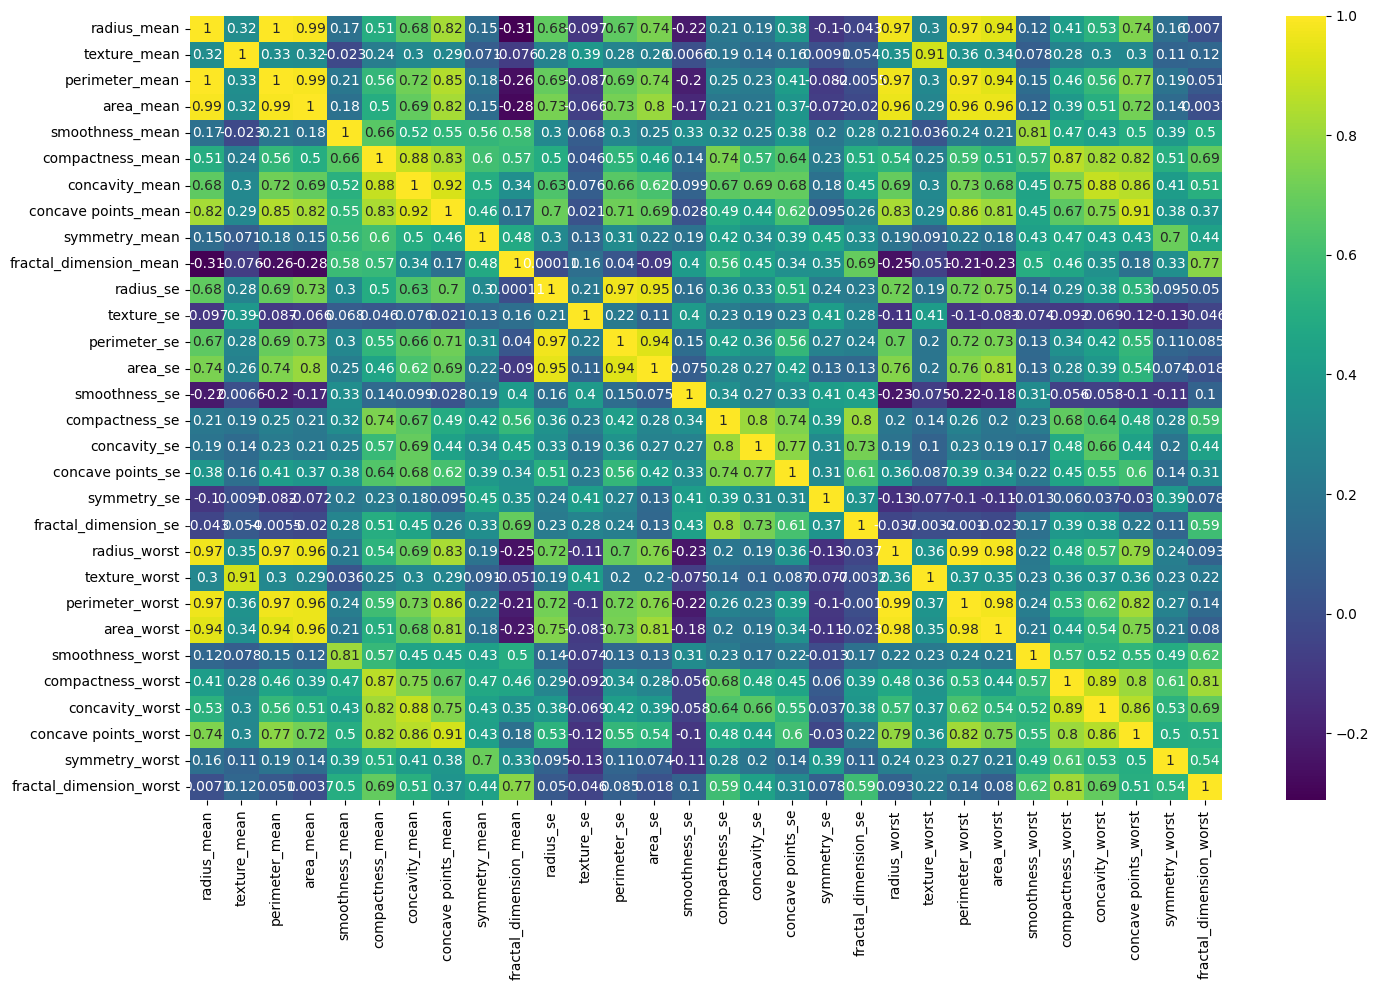

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes('number').corr(), annot = True, cmap = 'viridis')
plt.tight_layout()
plt.show()

<pre>
Almost all of the variable is having a positive correlation with each other.
Anyways, let's split the data into x and y, then we will see ahead


</pre>

In [20]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0:1]

In [22]:
X.sample()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
346        12.06          18.9           76.66      445.3          0.08386   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
346           0.05794         0.00751             0.008488         0.1555   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
346                 0.06048  ...         13.64          27.06   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
346            86.54       562.6            0.1289             0.1352   

     concavity_worst  concave points_worst  symmetry_worst  \
346          0.04506               0.05093           0.288   

     fractal_dimension_worst  
346                  0.08083  

[1 rows x 30 columns]

In [23]:
y.sample()

diagnosis
211         B

In [24]:
X.shape

(569, 30)

In [25]:
y.shape

(569, 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [28]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
10         16.02         23.24          102.70      797.8          0.08206   
170        12.32         12.39           78.85      464.1          0.10280   
407        12.85         21.37           82.63      514.5          0.07551   
430        14.90         22.53          102.10      685.0          0.09947   
27         18.61         20.25          122.10     1094.0          0.09440   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
10            0.06669         0.03299              0.03323         0.1528   
170           0.06981         0.03987              0.03700         0.1959   
407           0.08316         0.06126              0.01867         0.1580   
430           0.22250         0.27330              0.09711         0.2041   
27            0.10660         0.14900              0.07731         0.1697   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
10                  0.05697  ...         19.19          33.88   
170                 0.05955  ...         13.50          15.64   
407                 0.06114  ...         14.40          27.01   
430                 0.06898  ...         16.35          27.57   
27                  0.05699  ...         21.31          27.26   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
10            123.80      1150.0           0.11810             0.1551   
170            86.97       549.1           0.13850             0.1266   
407            91.63       645.8           0.09402             0.1936   
430           125.40       832.7           0.14190             0.7090   
27            139.90      1403.0           0.13380             0.2117   

     concavity_worst  concave points_worst  symmetry_worst  \
10            0.1459               0.09975          0.2948   
170           0.1242               0.09391          0.2827   
407           0.1838               0.05601          0.2488   
430           0.9019               0.24750          0.2866   
27            0.3446               0.14900          0.2341   

     fractal_dimension_worst  
10                   0.08452  
170                  0.06771  
407                  0.08151  
430                  0.11550  
27                   0.07421  

[5 rows x 30 columns]

In [29]:
y_train.head()

diagnosis
10          M
170         B
407         B
430         M
27          M

In [30]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\MSIGE65\AppData\Local\Temp\ipykernel_23852\3803436990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data['diagnosis'].value_counts(), palette = {'B': 'green', 'M': 'red'})


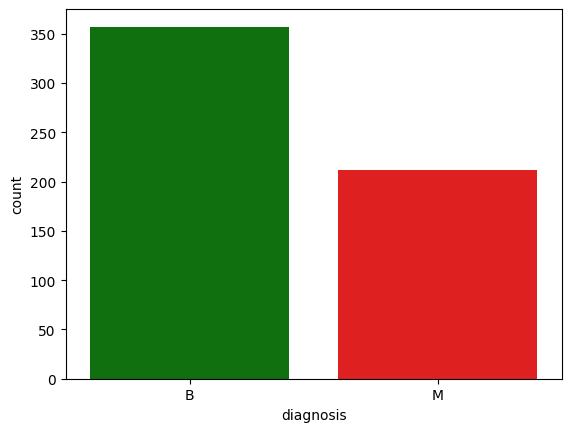

In [31]:
sns.barplot(data['diagnosis'].value_counts(), palette = {'B': 'green', 'M': 'red'})
plt.show()

In [32]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
col_1to9 =['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean']

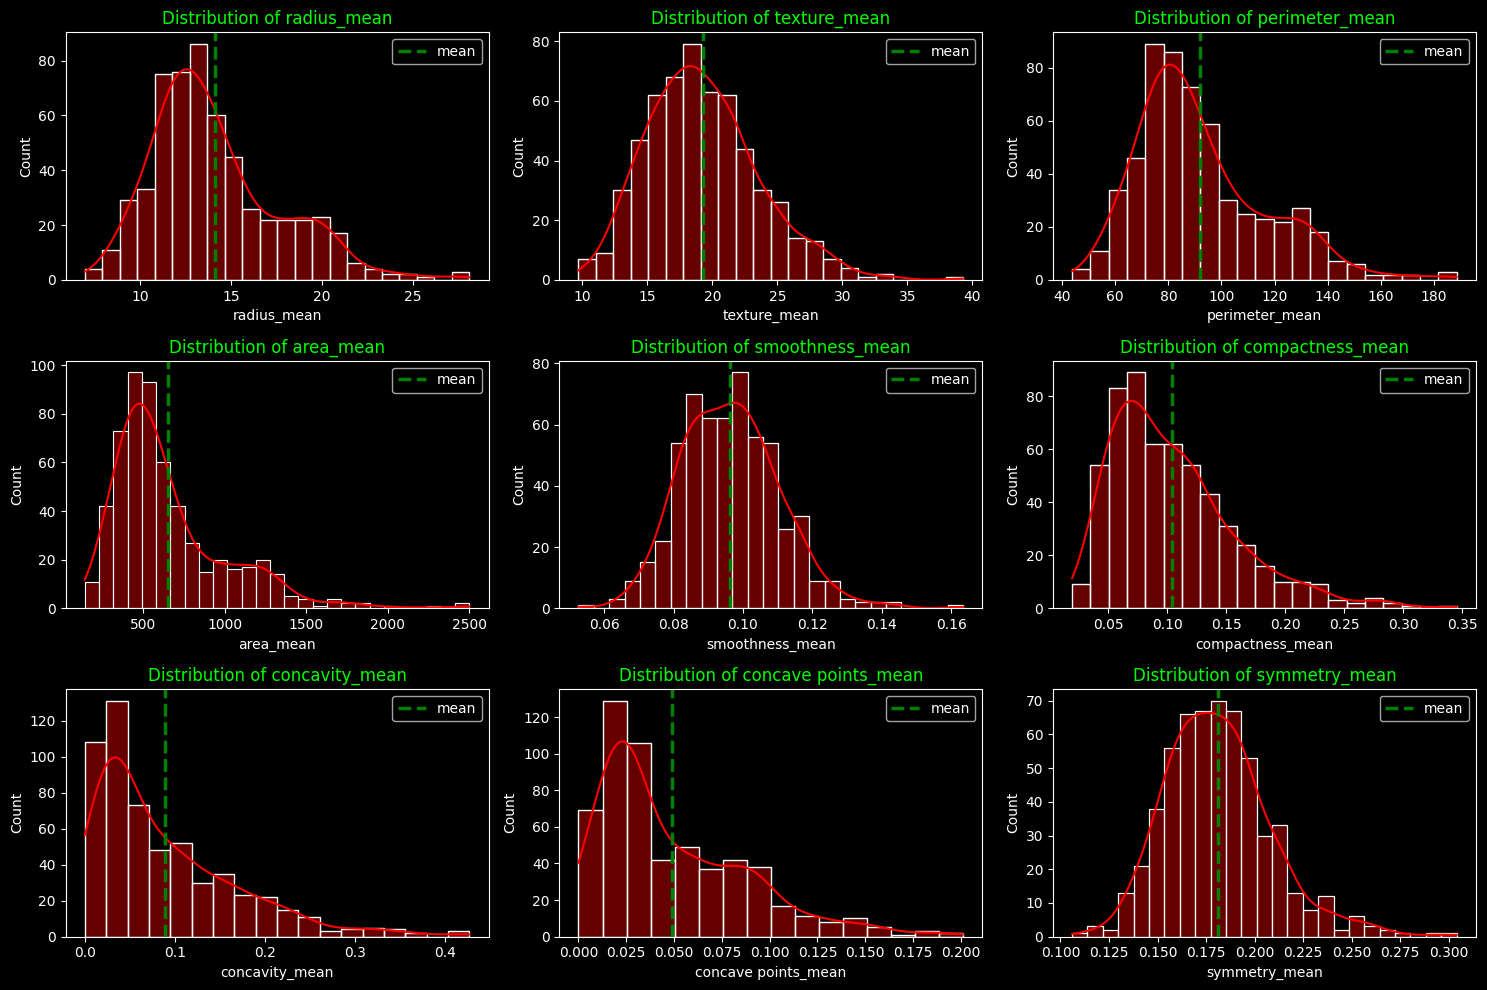

In [34]:
plt.style.use('dark_background')
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, j in enumerate(col_1to9):
    sns.histplot(data[j], ax = ax[i//3, i%3], kde = True, color = 'red', alpha = 0.4)
    ax[i//3, i%3].set_title(f"Distribution of {j}", color = 'lime')
    ax[i//3, i%3].axvline(data[j].mean(), color = 'green', linestyle = '--', linewidth = 2.5, label = 'mean')
    ax[i//3, i%3].legend()
plt.tight_layout()
plt.show()


In [35]:
col_10to18 = ['fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se']

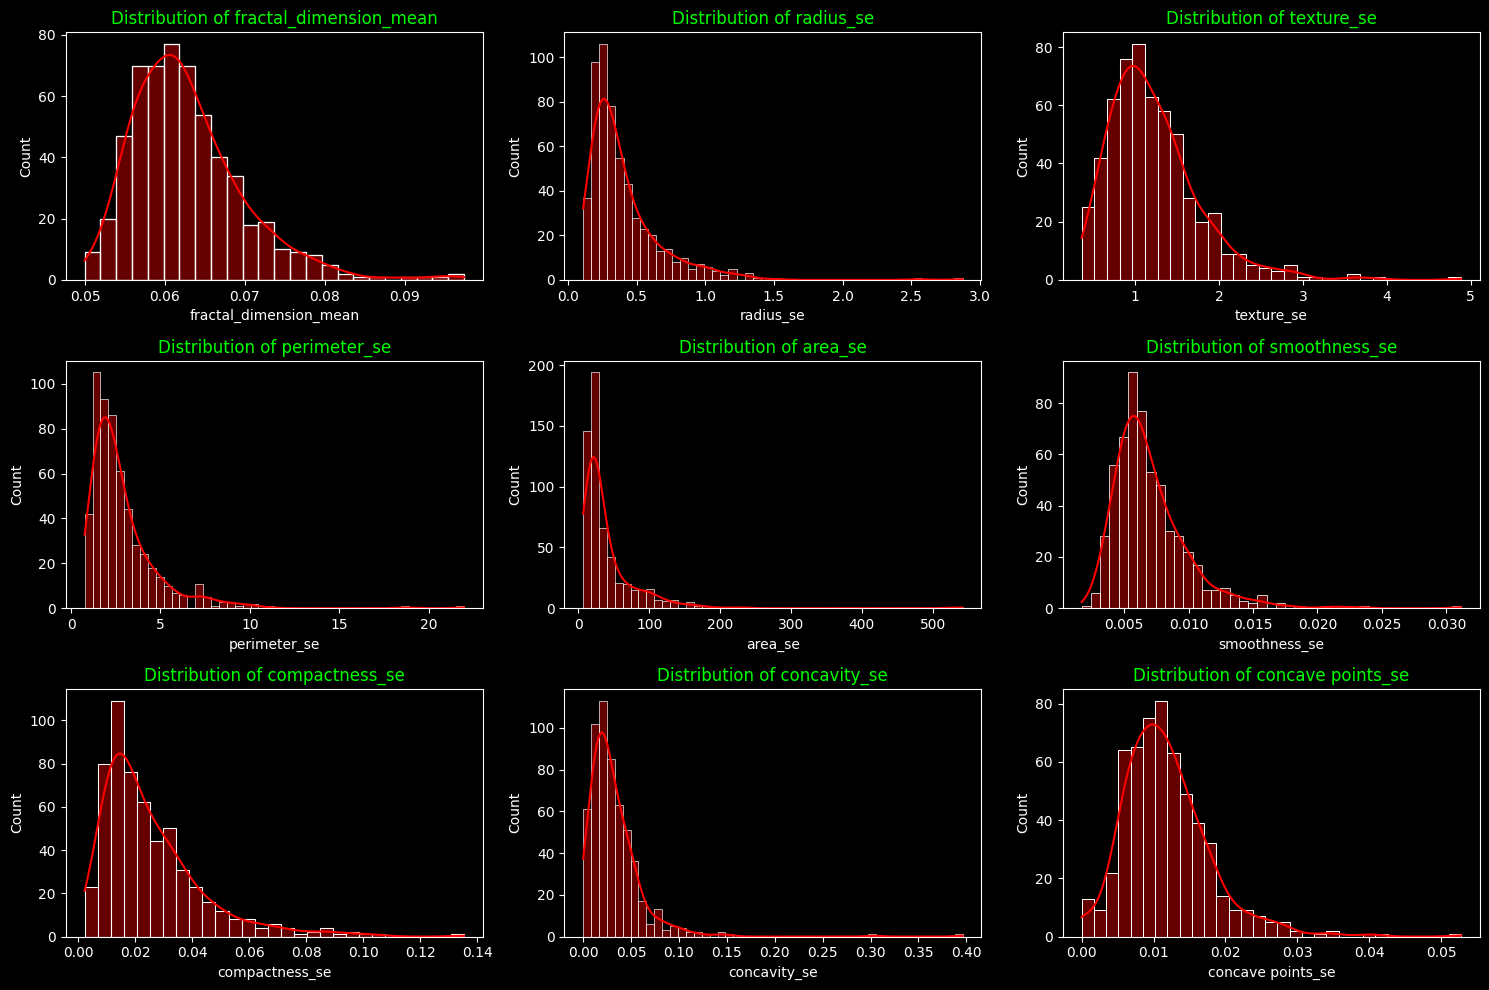

In [36]:
plt.style.use('dark_background')
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, j in enumerate(col_10to18):
    sns.histplot(data[j], ax = ax[i//3, i%3], kde = True, color = 'red', alpha = 0.4)
    ax[i//3, i%3].set_title(f"Distribution of {j}", color = 'lime')
plt.tight_layout()
plt.show()


In [37]:
col_19to27 = ['symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst']

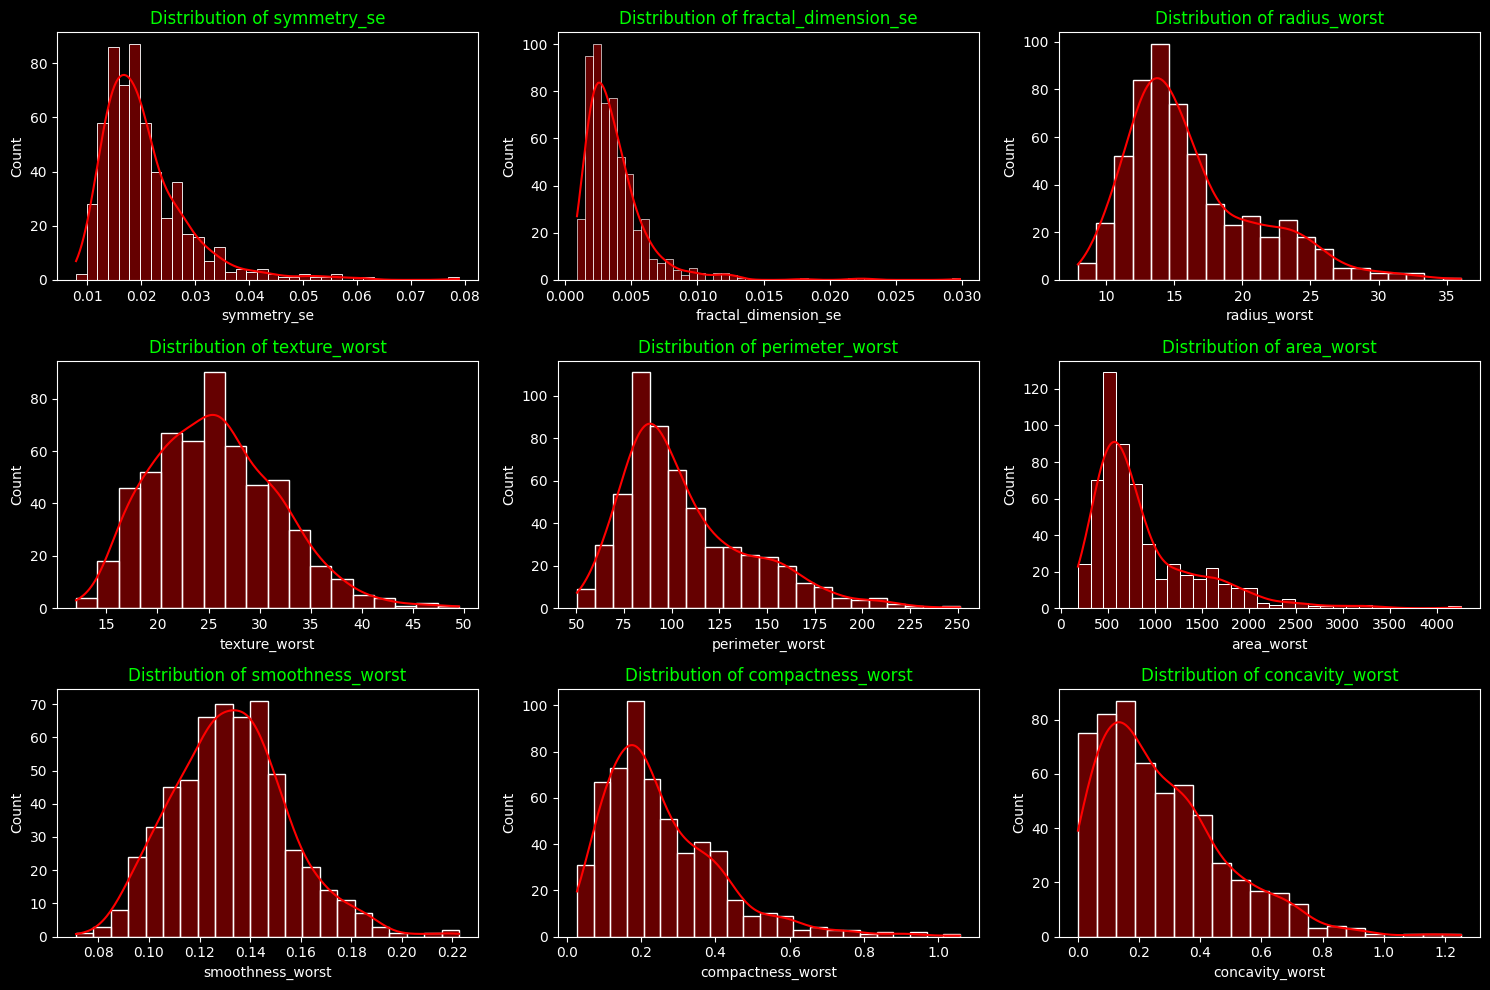

In [38]:
plt.style.use('dark_background')
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, j in enumerate(col_19to27):
    sns.histplot(data[j], ax = ax[i//3, i%3], kde = True, color = 'red', alpha = 0.4)
    ax[i//3, i%3].set_title(f"Distribution of {j}", color = 'lime')
plt.tight_layout()
plt.show()


In [39]:
col_28to30 = ['concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

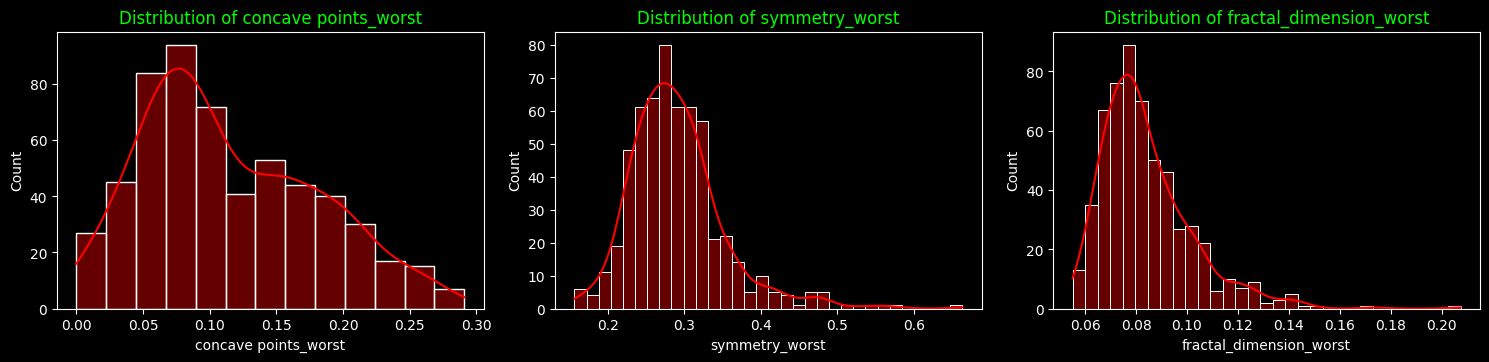

In [40]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()
for i, j in enumerate(col_28to30):
    sns.histplot(data[j], ax = ax[i], kde = True, color = 'red', alpha = 0.4)
    ax[i].set_title(f"Distribution of {j}", color = 'lime')

for i in range(len(col_28to30), len(ax)):
    ax[i].set_visible(False)
plt.tight_layout()
plt.show()


## What do the data represents here?

<pre style = "color: gold">

- All the features here represenets just the measurements of the nuclei of the breast tissue cells.

>> Each cell hasa  nucleus, (the central part containing DNA)
>> The dataset quantifies size, shape and texture of the nuclei from fine needle aspirate (FNA) images

-----------------------------------------------------------------------------------------------------------------



>> Each feature represents properties of the nucleus, 

- We have 10 such features here.

- Each feature is measured three times in different manner:

1) _mean ------------> average across all nuclei in the sample.

2) _se --------------> Standard error of that measurement.

3) _worst -----------> mean of the three (example) largest (most abnormal) nuclei.




In [41]:
mean_data = pd.concat([data.filter(like = '_mean'), data['diagnosis']], axis=1)
se_data = pd.concat([data.filter(like = '_se'), data['diagnosis']], axis=1)
worst_data = pd.concat([data.filter(like = '_worst'), data['diagnosis']], axis=1)

In [42]:
mean_data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean diagnosis  
0                 0.07871         M  
1                 0.05667         M  
2                 0.05999         M  
3                 0.09744         M  
4                 0.05883         M

In [43]:
se_data.head()

radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0     1.0950      0.9053         8.589   153.40       0.006399   
1     0.5435      0.7339         3.398    74.08       0.005225   
2     0.7456      0.7869         4.585    94.03       0.006150   
3     0.4956      1.1560         3.445    27.23       0.009110   
4     0.7572      0.7813         5.438    94.44       0.011490   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0         0.04904       0.05373            0.01587      0.03003   
1         0.01308       0.01860            0.01340      0.01389   
2         0.04006       0.03832            0.02058      0.02250   
3         0.07458       0.05661            0.01867      0.05963   
4         0.02461       0.05688            0.01885      0.01756   

   fractal_dimension_se diagnosis  
0              0.006193         M  
1              0.003532         M  
2              0.004571         M  
3              0.009208         M  
4              0.005115         M

In [44]:
worst_data.head()

radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst diagnosis  
0                  0.11890         M  
1                  0.08902         M  
2                  0.08758         M  
3                  0.17300         M  
4                  0.07678         M

<pre style = "color: lime">
We will see the stats of individual data level:



In [45]:
mean_data.describe().T

count        mean         std        min        25%  \
radius_mean             569.0   14.127292    3.524049    6.98100   11.70000   
texture_mean            569.0   19.289649    4.301036    9.71000   16.17000   
perimeter_mean          569.0   91.969033   24.298981   43.79000   75.17000   
area_mean               569.0  654.889104  351.914129  143.50000  420.30000   
smoothness_mean         569.0    0.096360    0.014064    0.05263    0.08637   
compactness_mean        569.0    0.104341    0.052813    0.01938    0.06492   
concavity_mean          569.0    0.088799    0.079720    0.00000    0.02956   
concave points_mean     569.0    0.048919    0.038803    0.00000    0.02031   
symmetry_mean           569.0    0.181162    0.027414    0.10600    0.16190   
fractal_dimension_mean  569.0    0.062798    0.007060    0.04996    0.05770   

                              50%        75%         max  
radius_mean              13.37000   15.78000    28.11000  
texture_mean             18.84000   21.80000    39.28000  
perimeter_mean           86.24000  104.10000   188.50000  
area_mean               551.10000  782.70000  2501.00000  
smoothness_mean           0.09587    0.10530     0.16340  
compactness_mean          0.09263    0.13040     0.34540  
concavity_mean            0.06154    0.13070     0.42680  
concave points_mean       0.03350    0.07400     0.20120  
symmetry_mean             0.17920    0.19570     0.30400  
fractal_dimension_mean    0.06154    0.06612     0.09744

<pre style = "color:red">

- The first red flag is the large std of area_mean.

- Rest of the std seems to be normal.



In [46]:
se_data.describe().T

count       mean        std       min        25%  \
radius_se             569.0   0.405172   0.277313  0.111500   0.232400   
texture_se            569.0   1.216853   0.551648  0.360200   0.833900   
perimeter_se          569.0   2.866059   2.021855  0.757000   1.606000   
area_se               569.0  40.337079  45.491006  6.802000  17.850000   
smoothness_se         569.0   0.007041   0.003003  0.001713   0.005169   
compactness_se        569.0   0.025478   0.017908  0.002252   0.013080   
concavity_se          569.0   0.031894   0.030186  0.000000   0.015090   
concave points_se     569.0   0.011796   0.006170  0.000000   0.007638   
symmetry_se           569.0   0.020542   0.008266  0.007882   0.015160   
fractal_dimension_se  569.0   0.003795   0.002646  0.000895   0.002248   

                            50%        75%        max  
radius_se              0.324200   0.478900    2.87300  
texture_se             1.108000   1.474000    4.88500  
perimeter_se           2.287000   3.357000   21.98000  
area_se               24.530000  45.190000  542.20000  
smoothness_se          0.006380   0.008146    0.03113  
compactness_se         0.020450   0.032450    0.13540  
concavity_se           0.025890   0.042050    0.39600  
concave points_se      0.010930   0.014710    0.05279  
symmetry_se            0.018730   0.023480    0.07895  
fractal_dimension_se   0.003187   0.004558    0.02984

In [47]:
worst_data.describe().T

count        mean         std        min        25%  \
radius_worst             569.0   16.269190    4.833242    7.93000   13.01000   
texture_worst            569.0   25.677223    6.146258   12.02000   21.08000   
perimeter_worst          569.0  107.261213   33.602542   50.41000   84.11000   
area_worst               569.0  880.583128  569.356993  185.20000  515.30000   
smoothness_worst         569.0    0.132369    0.022832    0.07117    0.11660   
compactness_worst        569.0    0.254265    0.157336    0.02729    0.14720   
concavity_worst          569.0    0.272188    0.208624    0.00000    0.11450   
concave points_worst     569.0    0.114606    0.065732    0.00000    0.06493   
symmetry_worst           569.0    0.290076    0.061867    0.15650    0.25040   
fractal_dimension_worst  569.0    0.083946    0.018061    0.05504    0.07146   

                               50%         75%        max  
radius_worst              14.97000    18.79000    36.0400  
texture_worst             25.41000    29.72000    49.5400  
perimeter_worst           97.66000   125.40000   251.2000  
area_worst               686.50000  1084.00000  4254.0000  
smoothness_worst           0.13130     0.14600     0.2226  
compactness_worst          0.21190     0.33910     1.0580  
concavity_worst            0.22670     0.38290     1.2520  
concave points_worst       0.09993     0.16140     0.2910  
symmetry_worst             0.28220     0.31790     0.6638  
fractal_dimension_worst    0.08004     0.09208     0.2075

In [48]:
mal_data = data.query("diagnosis=='M'")
ben_data = data.query("diagnosis=='B'")

<pre>
Let's plot the Malignant and Benign mean plots of data to compare the nuclei of both.



In [49]:
mean_cols = data.filter(like="_mean").columns
se_cols = data.filter(like="_se").columns
worst_cols = data.filter(like="_worst").columns

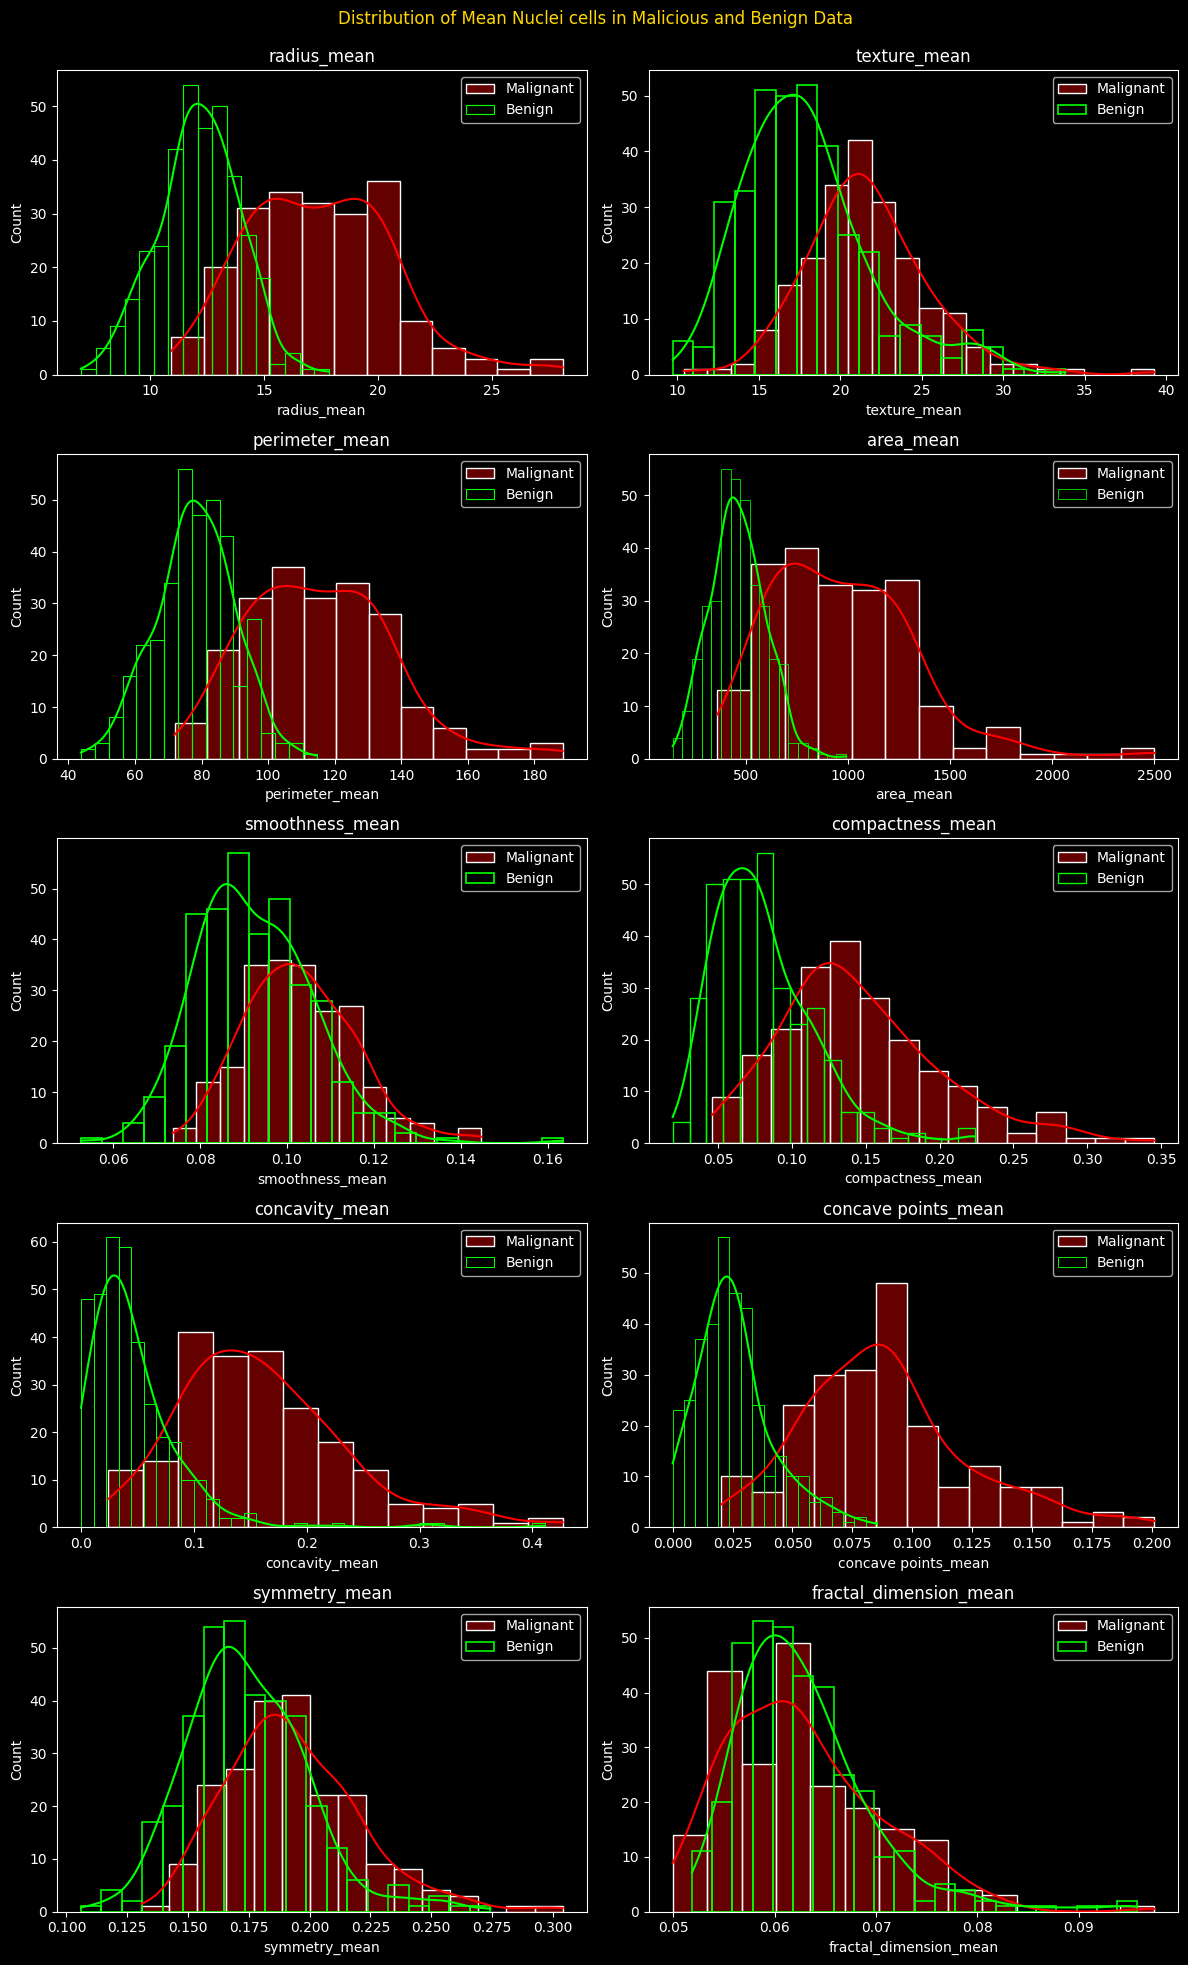

In [50]:
fig, ax = plt.subplots(5, 2, figsize=(12, 20))
ax = ax.flatten()

for i, j in enumerate(mean_cols):
    plt.suptitle("Distribution of Mean Nuclei cells in Malicious and Benign Data", color = 'gold')
    sns.histplot(mal_data[j], ax = ax[i], color='red', label = 'Malignant', alpha=0.4, kde = True)
    sns.histplot(ben_data[j], ax = ax[i], color='lime', label = 'Benign', fill = False, kde = True)
    ax[i].set_title(j)
    ax[i].legend()
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<pre style = "color: skyblue">

🧬 The key idea

The dataset’s features describe:

Size → radius, area, perimeter

Shape irregularity → smoothness, compactness, concavity, concave points

Texture → variation in gray-scale values

Fractal dimension → shape complexity



<pre>

>> We can see here that size and shape irregualirty factors in the normal nuclei and malignant nuclei are way off!!

>> This graph is a proof for that, and if we want we can even prove that the difference we are seeing is 
   statistically significant.
>> We just have to do some statistical test for that, which we will do it later.

<h1 style = "color: gold">STAT TEST NEEDED HERE!!</h1>
<br></pre>

In [51]:
mean_data

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean diagnosis  
0                   0.07871         M  
1                   0.05667         M  
2                   0.05999         M  
3                   0.09744         M  
4                   0.05883         M  
..                      ...       ...  
564                 0.05623         M  
565                 0.05533         M  
566                 0.05648         M  
567                 0.07016         M  
568                 0.05884         B  

[569 rows x 11 columns]

<pre style = "color: salmon">
What I want to achieve is that, if we are looking mean data, 

- I wnat to check for each column, mean of malignant cells and benign cells are different and is statistically significant.

>> First of all, I have a numeric variable and a categorical variable 

>> We should deploy two sample mean comparison. 

- that means, we need independent t-test (or Welch's t-test if variances differ)



### Independent t-test

In [52]:
mean_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [53]:
import scipy.stats as stats

In [54]:
def normality_check(data1, data2, col, name1, name2):

    # First check for normality of data, let's construct a plot for two groups:

    for i in col:
        fig, ax = plt.subplots(1, 3, figsize=(15, 4))
        ax = ax.flatten()
        sns.histplot(data1, x=i,kde=True, color = 'red', alpha = 0.4, ax = ax[0], label = name1)
        sns.histplot(data2, x = i, kde=True, color='lime', fill = False, ax = ax[0], label = name2)
        ax[0].set_title(f"{i} distribution.", color='gold')
        ax[0].legend()
        

        # Next we will create a Q-Q plot to check for normality

        stats.probplot(data1[i], dist = "norm", plot = ax[1])
        ax[1].set_title(f"{name1}-{i} Q-Q plot")
        stats.probplot(data2[i], dist = "norm", plot = ax[2])
        ax[2].set_title(f"{name2}-{i} Q-Q plot")

        # Let's use a anderson darling test also to check the normality

        result = stats.anderson(data1[i], dist = "norm")
        print("\n\n\n")
        if result.statistic < result.critical_values[2]:
            print(colored(f"The {i} in {name1} is normally distributed.", "green"))
        else:
           print(colored(f"The {i} in {name1} is not normally distributed.", "red"))

        result_1 = stats.anderson(data2[i], dist = "norm")
        if result_1.statistic < result_1.critical_values[2]:
            print(colored(f"The {i} in {name2} is normally distributed.", "green"))

        else:
            print(colored(f"The {i} in {name2} is not normally distributed.", "red"))
        
        
    plt.tight_layout()
    plt.show()





The radius_mean in malignant data is not normally distributed.
The radius_mean in benign data is normally distributed.




The texture_mean in malignant data is not normally distributed.
The texture_mean in benign data is not normally distributed.




The perimeter_mean in malignant data is not normally distributed.
The perimeter_mean in benign data is normally distributed.




The area_mean in malignant data is not normally distributed.
The area_mean in benign data is normally distributed.




The smoothness_mean in malignant data is normally distributed.
The smoothness_mean in benign data is not normally distributed.




The compactness_mean in malignant data is not normally distributed.
The compactness_mean in benign data is not normally distributed.




The concavity_mean in malignant data is not normally distributed.
The concavity_mean in benign data is not normally distributed.




The concave points_mean in malignant data is not normally distributed.
The concave points_mean 

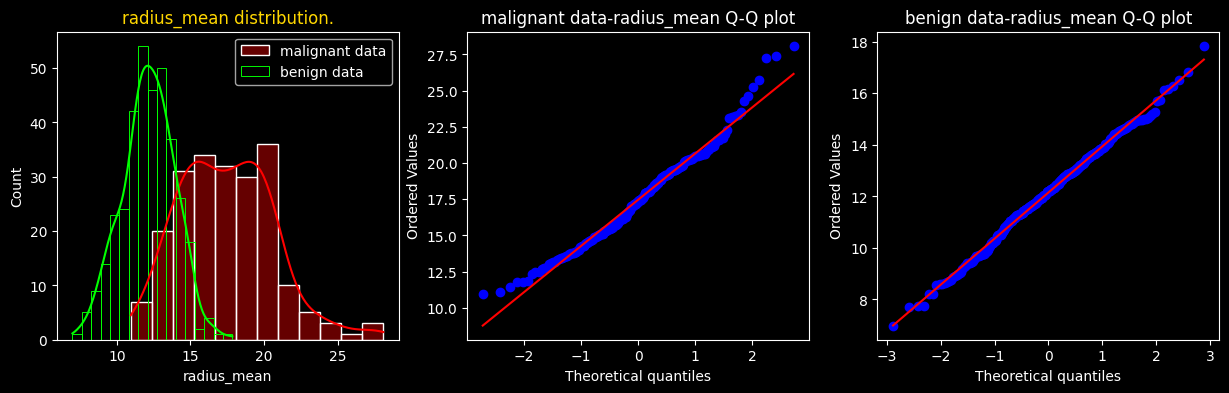

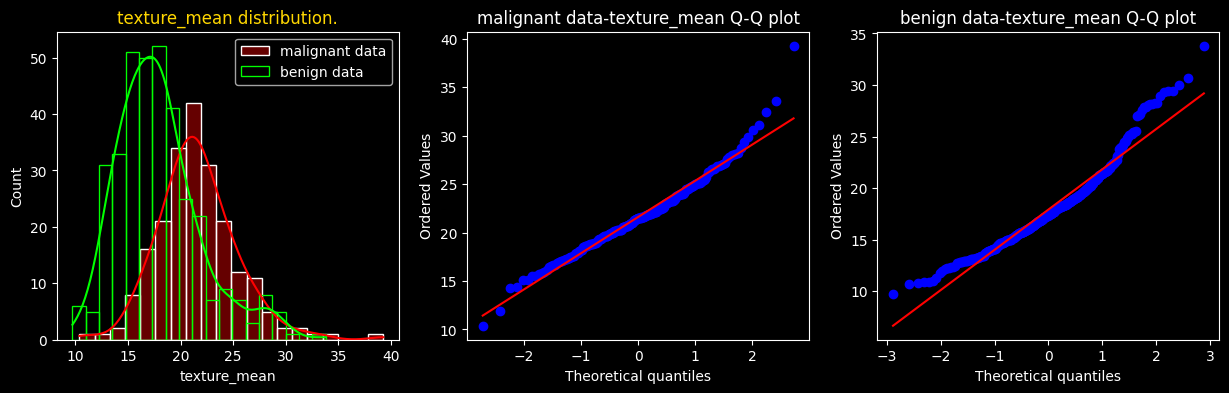

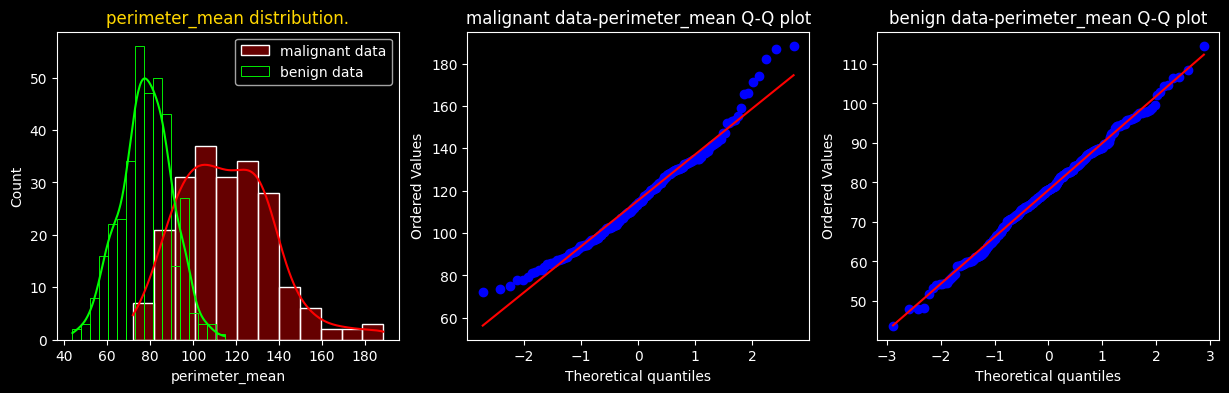

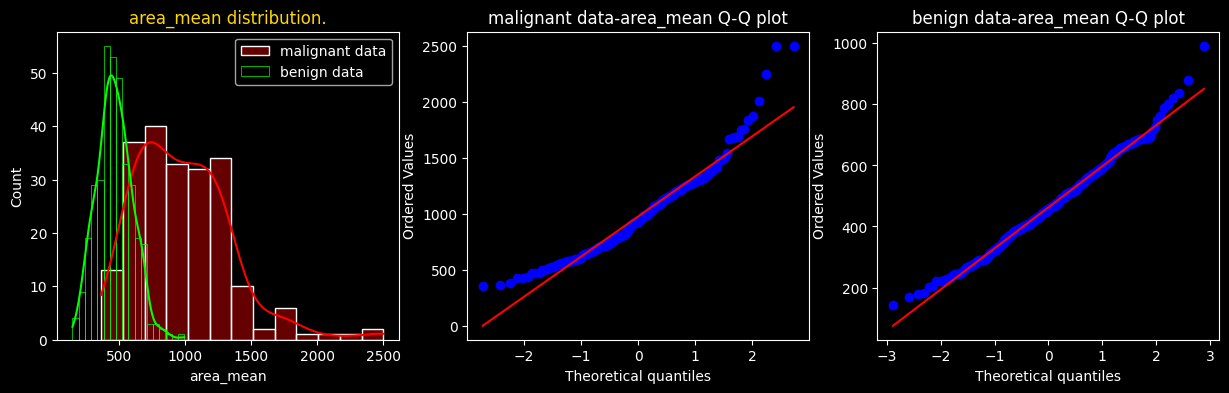

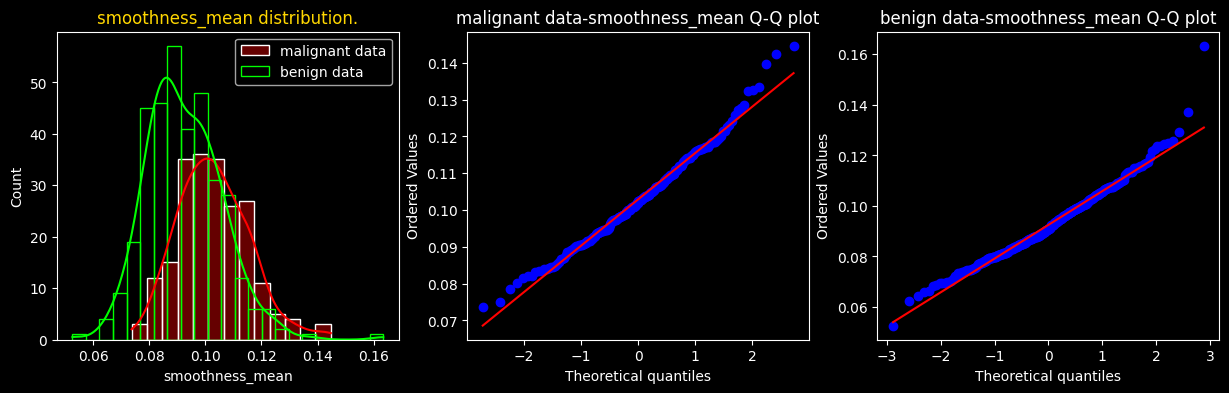

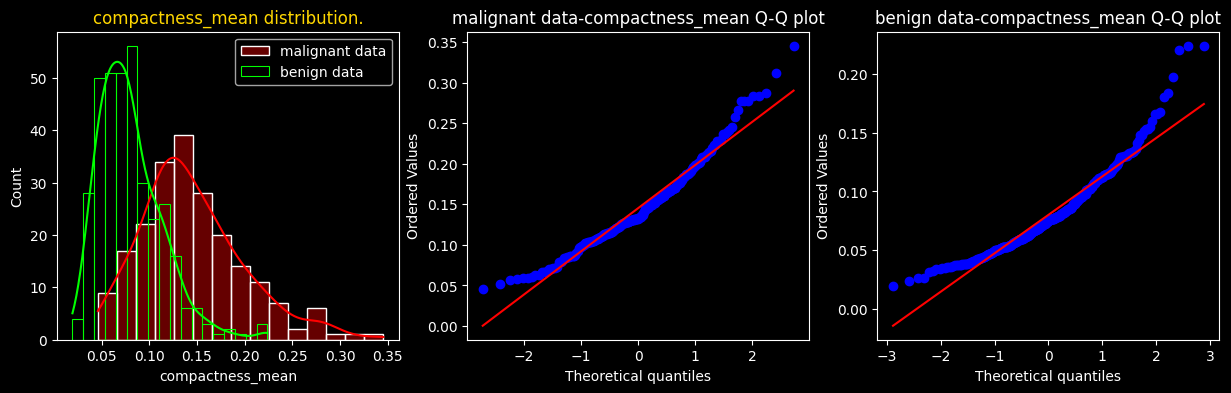

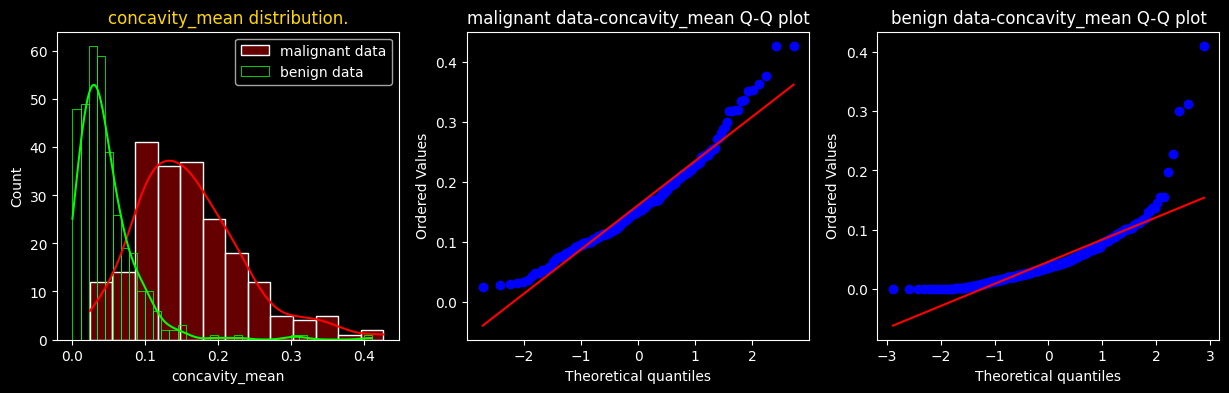

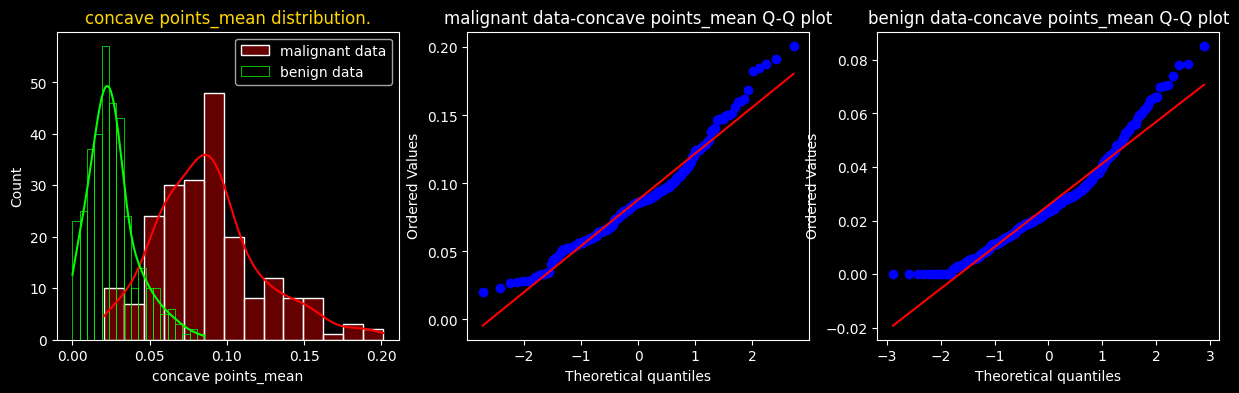

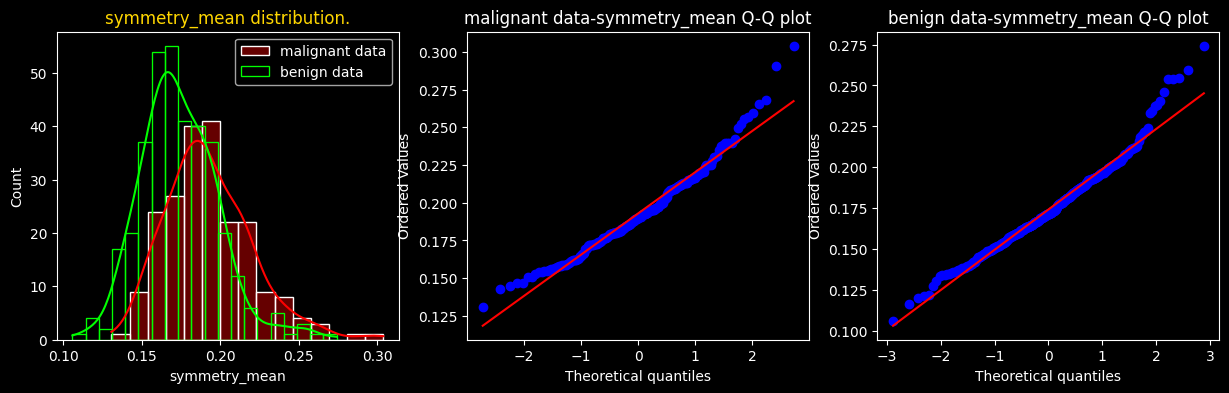

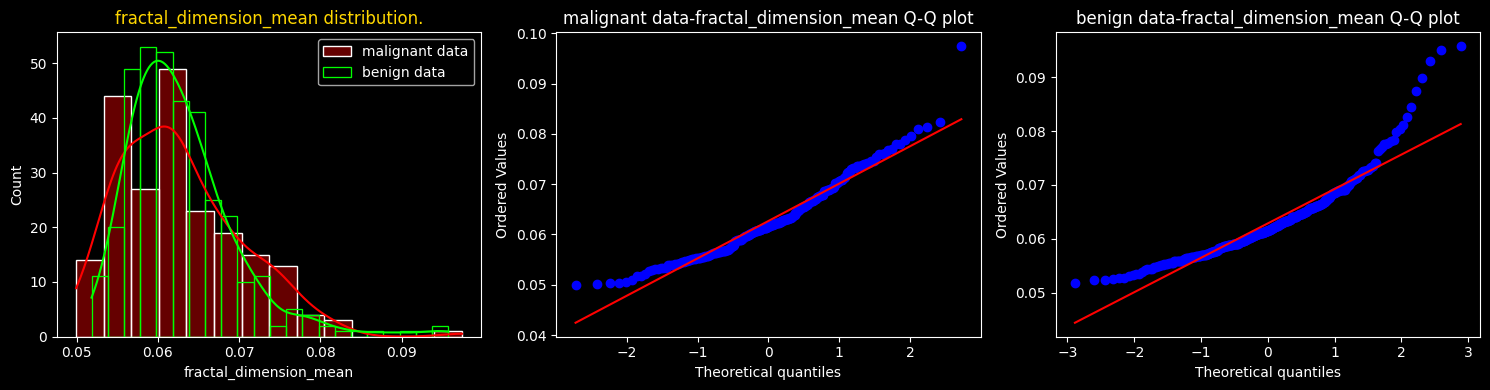

In [55]:
normality_check(mal_data, ben_data, mean_cols, "malignant data", "benign data")

<pre style = "color: cyan">

We have done a Anderson_Darling test and also have plotted a Q-Q plot with a hist and kde plot of 
both the groups to check for normality.
<br>
<span style = "color: gold; background-color: green; font-weight:bold; padding: 15px;">Observations</span>
<br>

- Most of the anderson-darling test turns out to reject the null hypothesis, 
- i.e. plots are not normally plotted.

>> But we can look up to the shape of the plot and can see that most of the data are roughly normal.


>> Since sample size for both the groups are large, for the normality assumption, 
   we will pass these two groups.

>> Let's discuss about the variance of these groups. 

>> Are they equal or have some different in it?!!

- We can plot a boxplot of both and can get the answer, also with the Leven's test!





In [56]:
def variance_check(data, hue, col, data1, data2, name1, name2):

    """
    >> This function will check for equal variance and then will do a independent t-test 
       or a welch's t-test depending upon the statistic result.

       
    data: dataframe which have both groups in it.
    hue: diagnosis here
    col: which column to use from the data
    data1: filtered group data
    data2: filtered group data
    name1: for labelling the first group 
    name2: for labelling hte second group"""


    from scipy.stats import ttest_ind

    # First we will check the boxplot of two group to see the variance
    fig, ax = plt.subplots(5,2, figsize=(15, 15))
    ax = ax.flatten()
    for i, j  in enumerate(col):
        sns.boxplot(data,x = j, ax = ax[i], hue = hue)
        ax[i].set_title(f"{j} Spread.", color='gold')
        ax[i].legend()
    plt.tight_layout()
    plt.show()
    print("*"*100, "\n\n")

    # Let's do a levene's test over here to test equal variance ---- H_o ---- equal variance H_a ----- unequal variance:
    
    for i in col:
        stat, p = stats.levene(data1[i], data2[i])
        print(f"Levene's test statistic for {i}: {stat:.4f}")
        print(f"p-Value: {p:.4f}")

        if p>=0.05:
            print(colored(f"{i} in {name1} and {name2} have equal variance.", "green"))

            stat_t, p_t = ttest_ind(data1[i], data2[i])
            print(f"\ntest statistic: {stat_t:.4f}")
            print(f"t test p-value: {p_t:.4f}")

            if p_t<=0.05:
                print(colored(f"\nMean of {i} in {name1} and {name2} are different and statistically significant.", "green"))
            else:
                print(colored(f"\nMean of {i} in {name1} and {name2} are same and the observation is not statistically significant.", "red"))
                
            
        else:
            print(colored(f"{i} in {name1} and {name2} have unequal variance!!", "red"))
            stat_t, p_t = ttest_ind(data1[i], data2[i], equal_var = False)
            print(f"\ntest statistic: {stat_t:.4f}")
            print(f"t test p-value: {p_t:.4f}")

            if p_t<0.05:
                print(colored(f"\nMean of {i} in {name1} and {name2} are different and statistically significant.", "green"))
            else:
                print(colored(f"\nMean of {i} in {name1} and {name2} are same and the observation is not statistically significant.", "red"))
        print("\n\n")






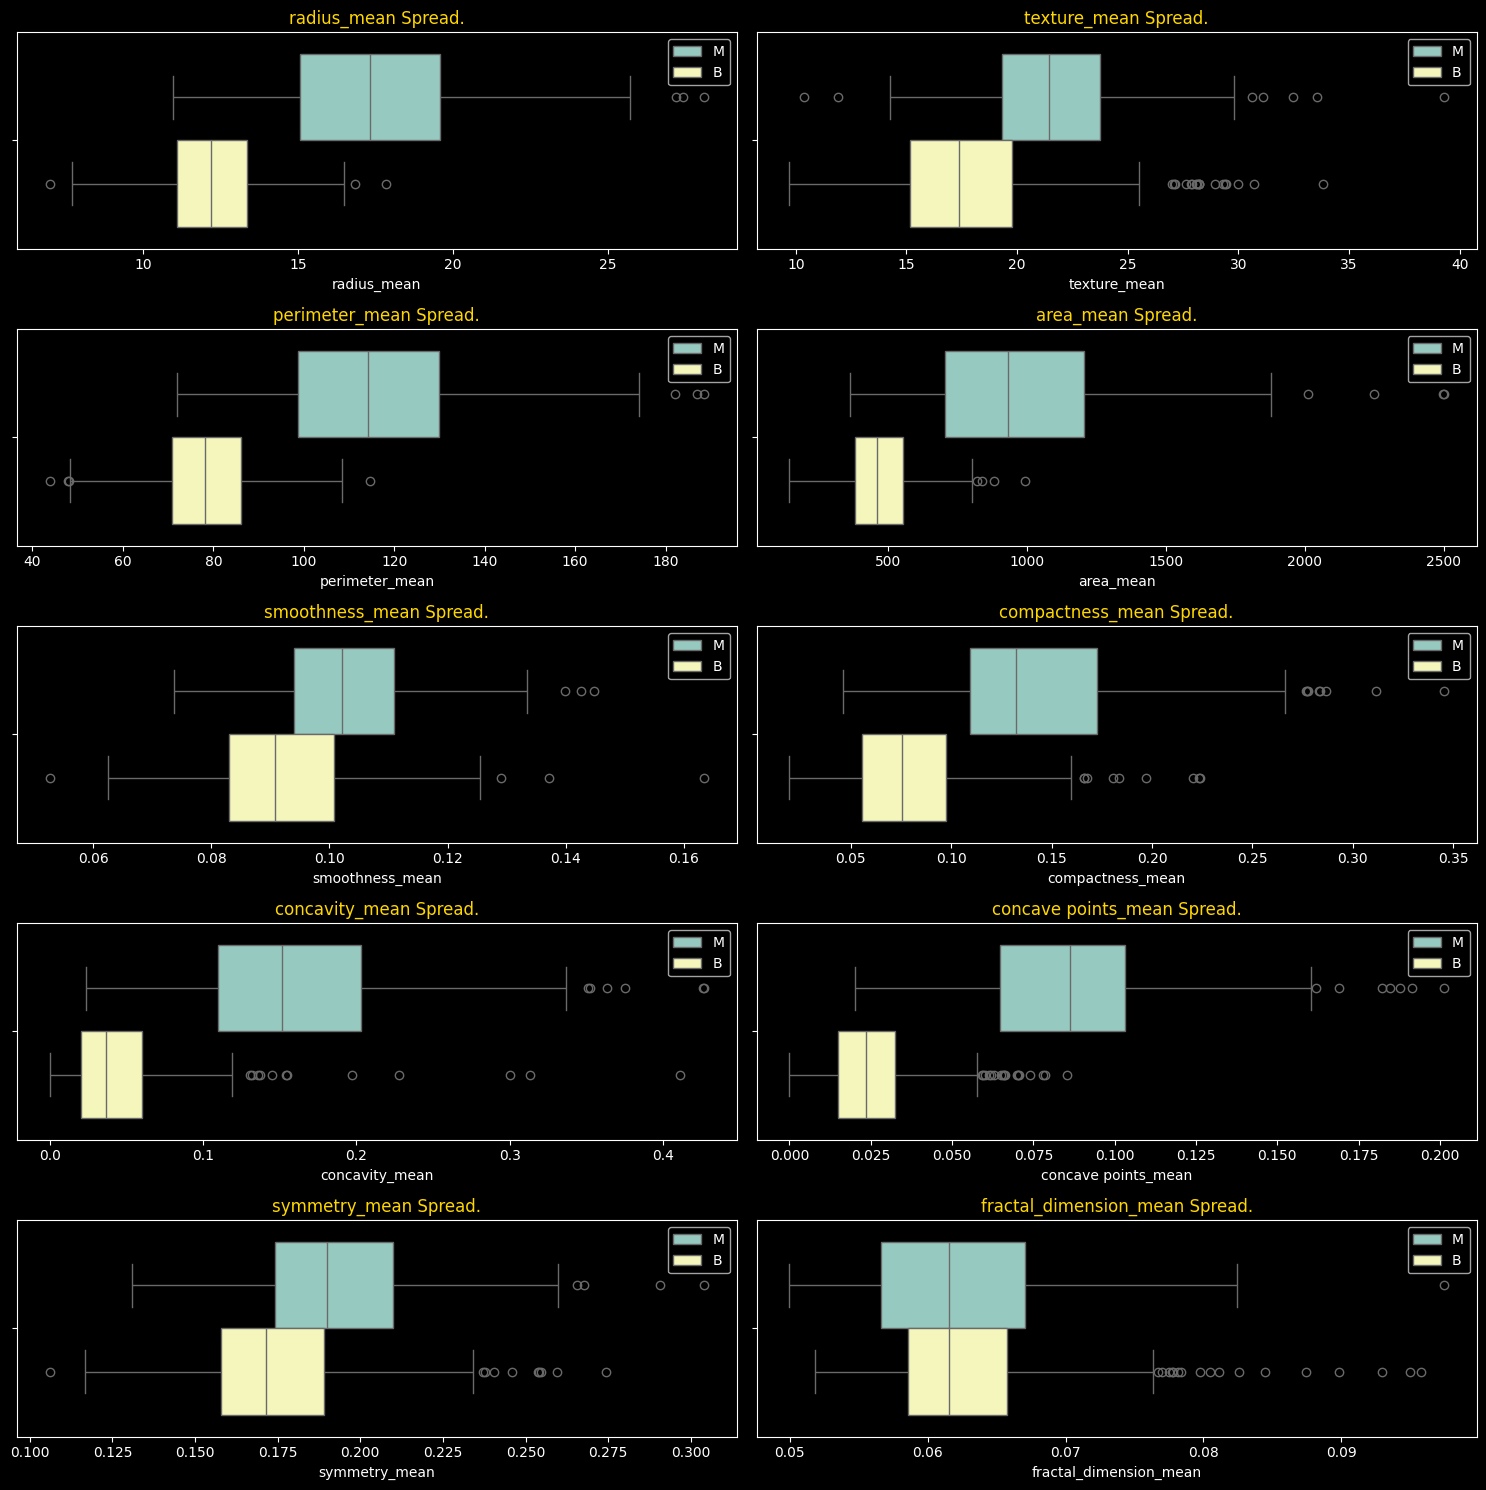

**************************************************************************************************** 


Levene's test statistic for radius_mean: 90.4771
p-Value: 0.0000
radius_mean in Malignant data and Benign data have unequal variance!!

test statistic: 22.2088
t test p-value: 0.0000

Mean of radius_mean in Malignant data and Benign data are different and statistically significant.



Levene's test statistic for texture_mean: 0.6840
p-Value: 0.4086
texture_mean in Malignant data and Benign data have equal variance.

test statistic: 10.8672
t test p-value: 0.0000

Mean of texture_mean in Malignant data and Benign data are different and statistically significant.



Levene's test statistic for perimeter_mean: 91.2369
p-Value: 0.0000
perimeter_mean in Malignant data and Benign data have unequal variance!!

test statistic: 22.9353
t test p-value: 0.0000

Mean of perimeter_mean in Malignant data and Benign data are different and statistically significant.



Levene's test statistic for ar

In [57]:
variance_check(data, 'diagnosis', mean_cols, mal_data, ben_data, "Malignant data", "Benign data")

<pre style = "color: salmon">

Hence we proved that except for fractal_dimension_mean,

- In both Malignant and Benign groups, rest of the mean varies and is statistically significant. 

- This is a great insight and we can rely on that. 

<div style = "background-color: red; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Conclusion from Independent t-test -------------------> mean data 

<pre style = "color: pink">

“From the independent t-tests conducted on the mean features, all variables except fractal_dimension_mean 
showed statistically significant differences between malignant and benign groups.

This suggests that, in the mean feature set, most attributes have a meaningful linear relationship with 
the diagnosis outcome, whereas fractal_dimension_mean does not exhibit a significant distinction between 
the two groups.”



<div style = "background-color: #8277a1; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Report ------------------> Mean Data

<pre style = "color: yellow">
“Based on the Levene’s and independent t-tests, all mean-level morphological features 
(such as radius_mean, area_mean, perimeter_mean, etc.) except fractal_dimension_mean 
demonstrated statistically significant differences (p < 0.05) between malignant and 
benign tumors. 

This indicates a likely linear association between these features and tumor diagnosis, 
implying that these mean characteristics contribute meaningfully to distinguishing 
between the two categories.”



<pre style = "color: lime">

Let's do the same for se_data and worst data as well.







The radius_se in Malignant Data is not normally distributed.
The radius_se in Benign Data is not normally distributed.




The texture_se in Malignant Data is not normally distributed.
The texture_se in Benign Data is not normally distributed.




The perimeter_se in Malignant Data is not normally distributed.
The perimeter_se in Benign Data is not normally distributed.




The area_se in Malignant Data is not normally distributed.
The area_se in Benign Data is not normally distributed.




The smoothness_se in Malignant Data is not normally distributed.
The smoothness_se in Benign Data is not normally distributed.




The compactness_se in Malignant Data is not normally distributed.
The compactness_se in Benign Data is not normally distributed.




The concavity_se in Malignant Data is not normally distributed.
The concavity_se in Benign Data is not normally distributed.




The concave points_se in Malignant Data is not normally distributed.
The concave points_se in Benign Data i

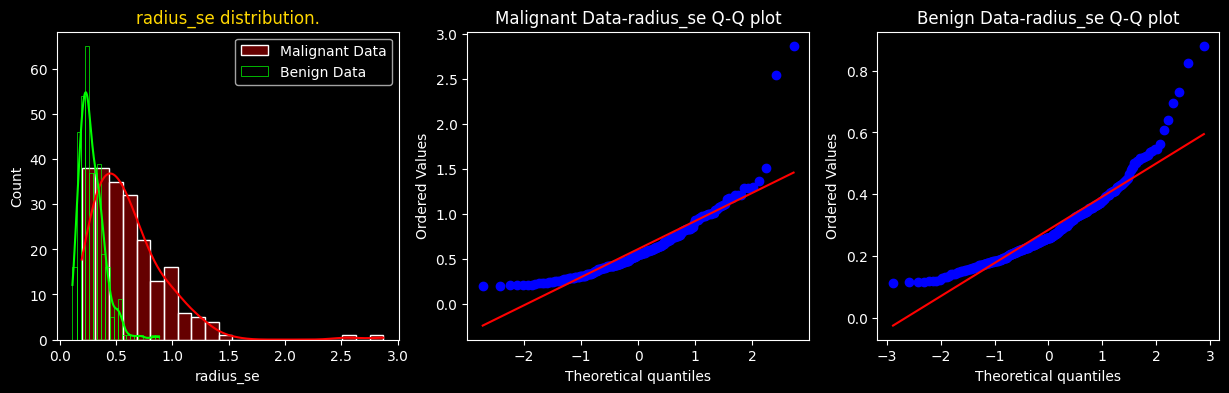

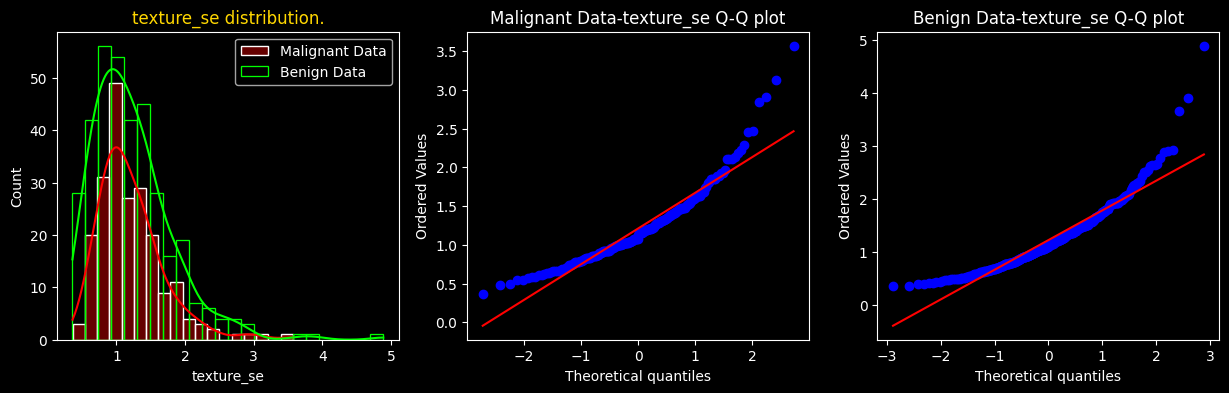

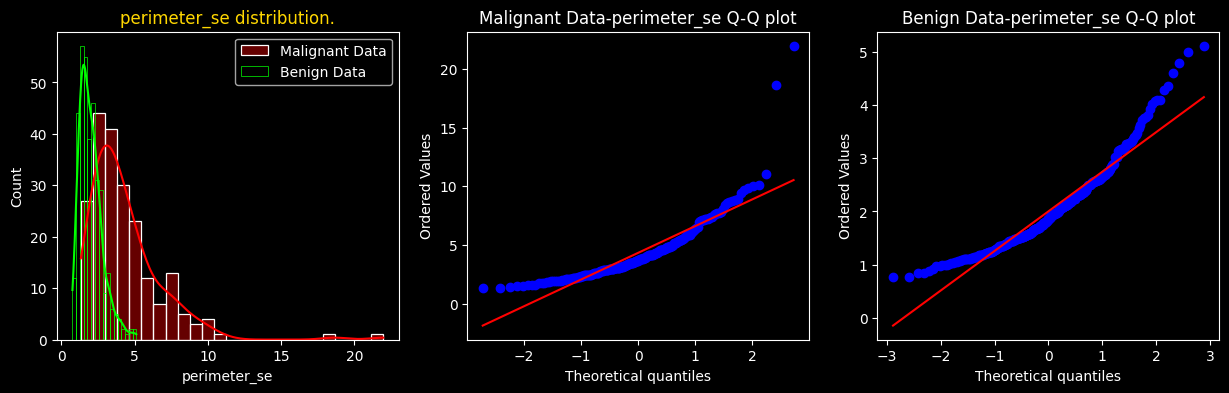

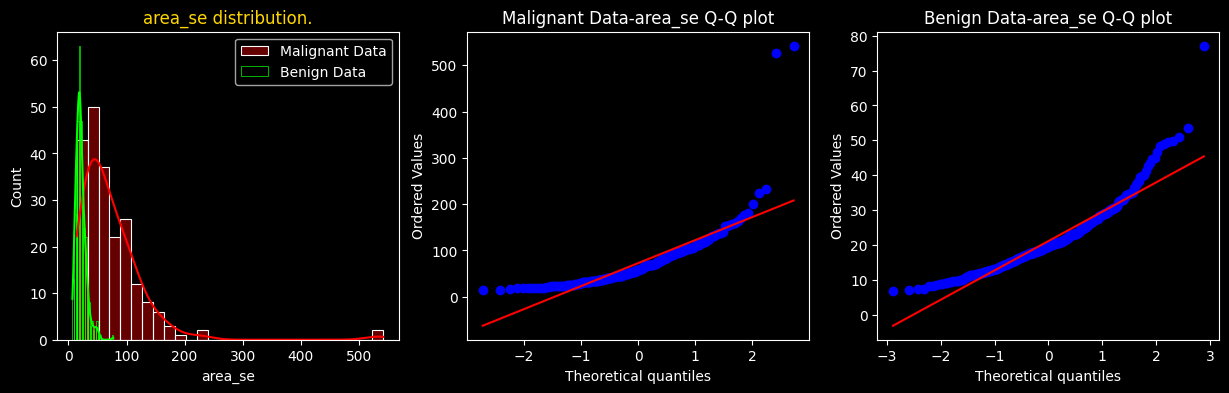

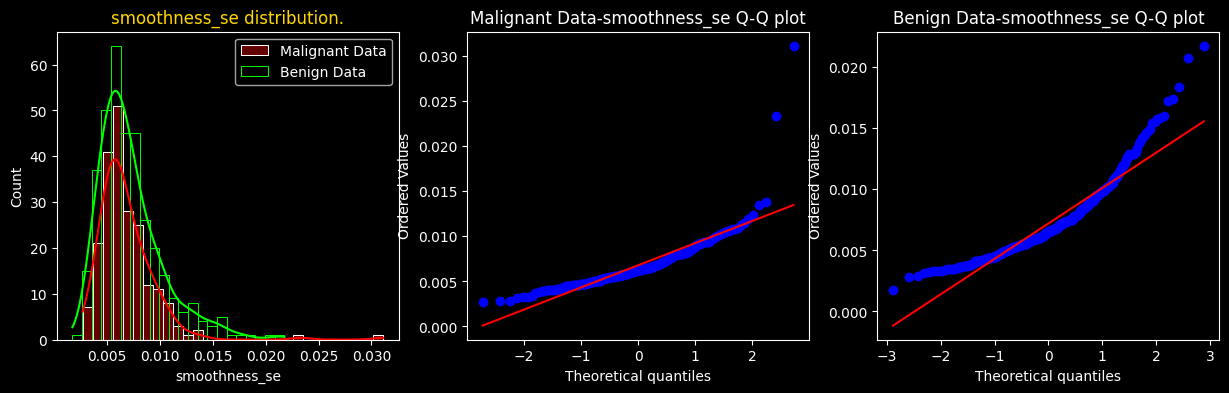

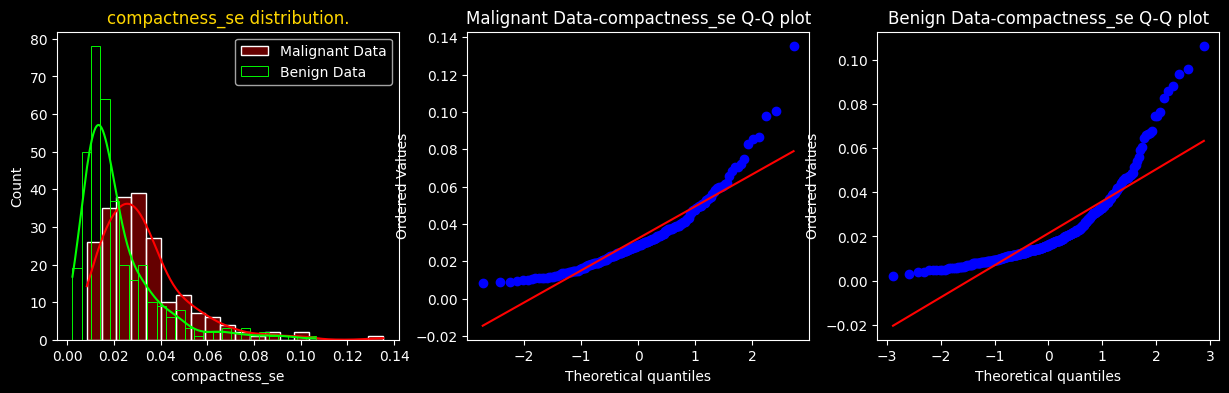

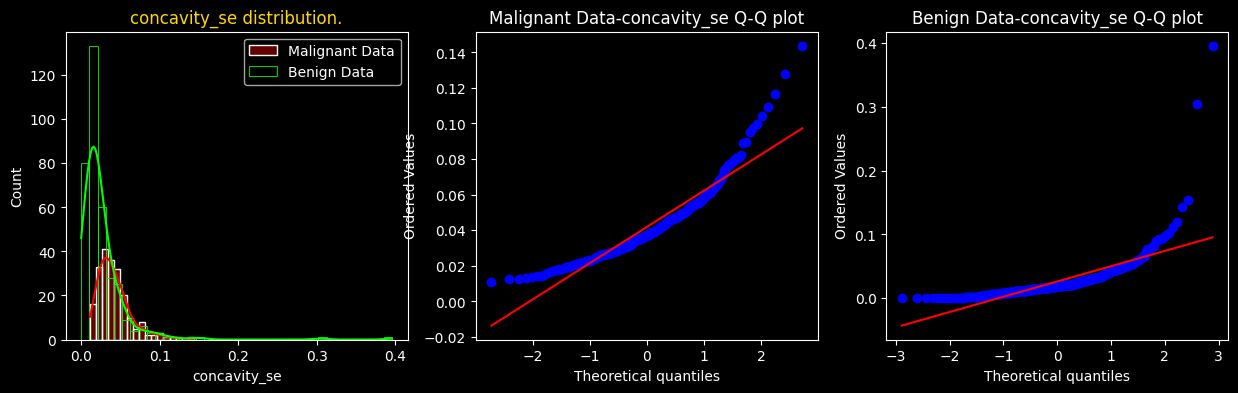

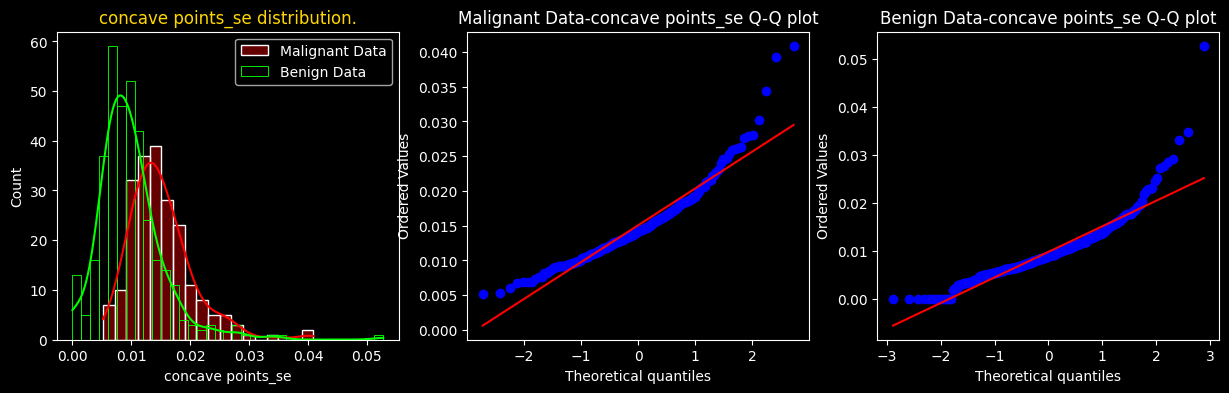

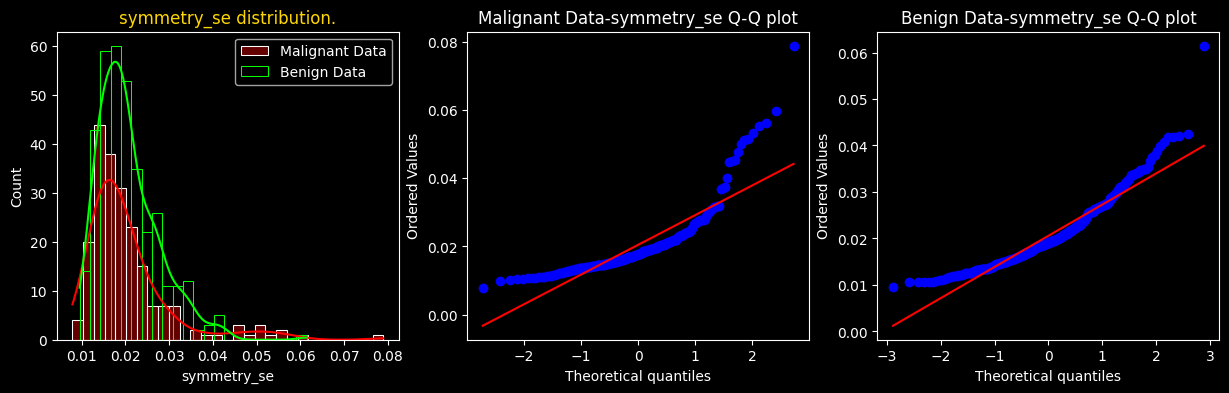

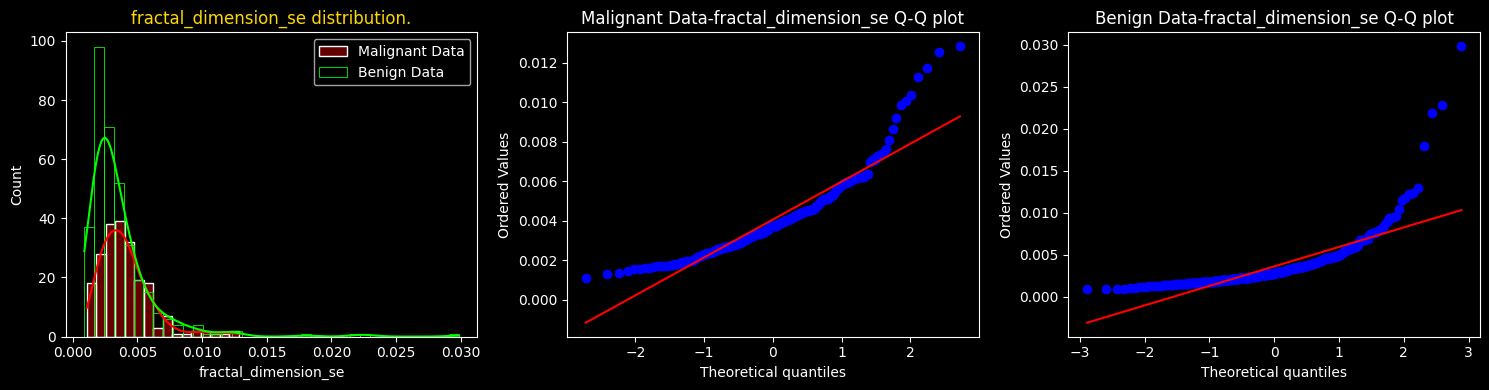

In [58]:
normality_check(mal_data, ben_data, se_cols, "Malignant Data", "Benign Data")

<pre> 
All of them are not normally distributed, but given the sample size, let's ignore it for now 
and then we can go with the the variance and independent ttest



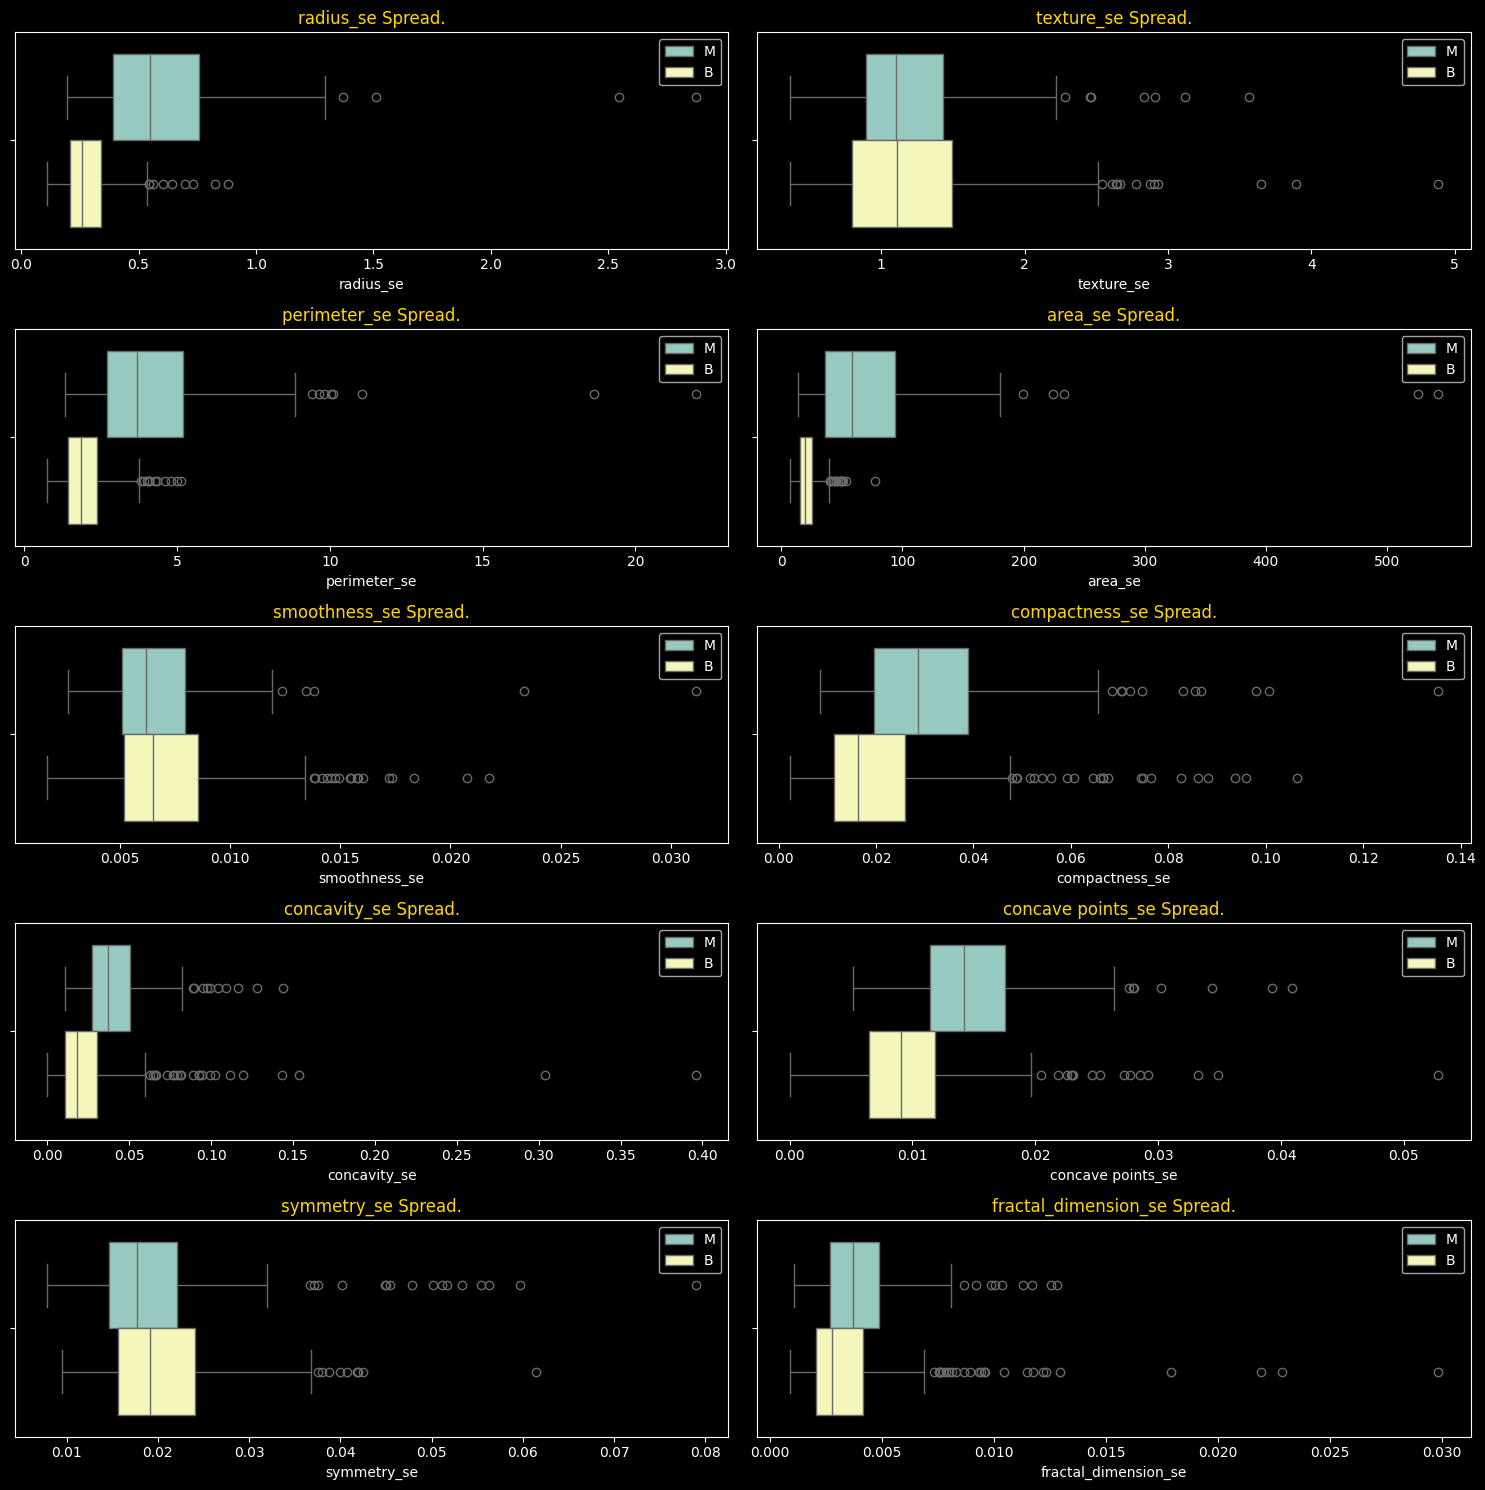

**************************************************************************************************** 


Levene's test statistic for radius_se: 110.9912
p-Value: 0.0000
radius_se in Malignant Data and benign Data have unequal variance!!

test statistic: 13.3007
t test p-value: 0.0000

Mean of radius_se in Malignant Data and benign Data are different and statistically significant.



Levene's test statistic for texture_se: 5.5779
p-Value: 0.0185
texture_se in Malignant Data and benign Data have unequal variance!!

test statistic: -0.2079
t test p-value: 0.8354

Mean of texture_se in Malignant Data and benign Data are same and the observation is not statistically significant.



Levene's test statistic for perimeter_se: 94.6628
p-Value: 0.0000
perimeter_se in Malignant Data and benign Data have unequal variance!!

test statistic: 12.8328
t test p-value: 0.0000

Mean of perimeter_se in Malignant Data and benign Data are different and statistically significant.



Levene's test statistic fo

In [59]:
variance_check(data, "diagnosis", se_cols, mal_data, ben_data, "Malignant Data", "benign Data")

<div style = "background-color: red; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Conclusion from Independent t-test -------------------> se data 

<pre style = "color: pink">

- SE is the standard error easured between the cell samples of the same patient.

- A larger SE means, there are more variation in the samples, like some cells are smaller and 
  some cells are larger, having a larger variance between them. --- may directly indicates tumor

- A small SE means, cell samples are not varied much. 
  there is not that much of variation and may not connect to tumor.


>> SO, from our observations, we can say that:

1) radius_se is significant
2) Perimeter_se is significant
3) area_se is significant
4) Compactness_se is significant
5) concavity_se is significant
6) concave points_se is significant.

>> So, these all are linear columns, which can be interpret according to the different mean sizes.



<div style = "background-color: #8277a1; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Report ------------------> se Data

<pre style="color:yellow">

The analysis of the standard error (SE) parameters revealed a set of features that play a crucial 
confirmatory role in the diagnostic interpretation of cellular abnormalities. 
Specifically, radius_se, perimeter_se, area_se, compactness_se, concavity_se, and concave points_se 
were found to be statistically significant, indicating that the variability within the cellular 
measurements of a single patient carries meaningful diagnostic information.


A larger SE reflects greater inconsistency among the cells — some appearing smaller, others much larger 
or more irregular — which is a typical morphological signature of malignant tumors, where cellular growth 
becomes uncontrolled and heterogeneous. 
Conversely, a smaller SE indicates a uniform cellular structure, 
commonly associated with benign samples where cell replication remains organized and consistent.

Therefore, these SE features can be interpreted as confirmatory indicators that complement the primary 
mean-based parameters (e.g., radius_mean, area_mean, etc.). 
While the mean columns describe the average cell characteristics, the SE columns capture the degree 
of variability within the same tissue sample, providing a secondary yet essential layer of diagnostic 
confirmation. 
In practice, this means that when initial mean-based observations suggest malignancy, the SE values of 
these six parameters can strengthen the confidence of that assessment by reflecting the degree of 
structural irregularity among the patient’s cells.

In summary, these six SE-based measurements serve as secondary linear predictors and confirmatory 
diagnostic markers, reinforcing the reliability of tumor classification when evaluated alongside 
the corresponding mean features.




---
<pre style = "color: lime">

Let's check for Worst_data now

</pre>
---







The radius_worst in Malignant Data is not normally distributed.
The radius_worst in Benign Data is normally distributed.




The texture_worst in Malignant Data is not normally distributed.
The texture_worst in Benign Data is not normally distributed.




The perimeter_worst in Malignant Data is not normally distributed.
The perimeter_worst in Benign Data is normally distributed.




The area_worst in Malignant Data is not normally distributed.
The area_worst in Benign Data is normally distributed.




The smoothness_worst in Malignant Data is normally distributed.
The smoothness_worst in Benign Data is normally distributed.




The compactness_worst in Malignant Data is not normally distributed.
The compactness_worst in Benign Data is not normally distributed.




The concavity_worst in Malignant Data is not normally distributed.
The concavity_worst in Benign Data is not normally distributed.




The concave points_worst in Malignant Data is normally distributed.
The concave point

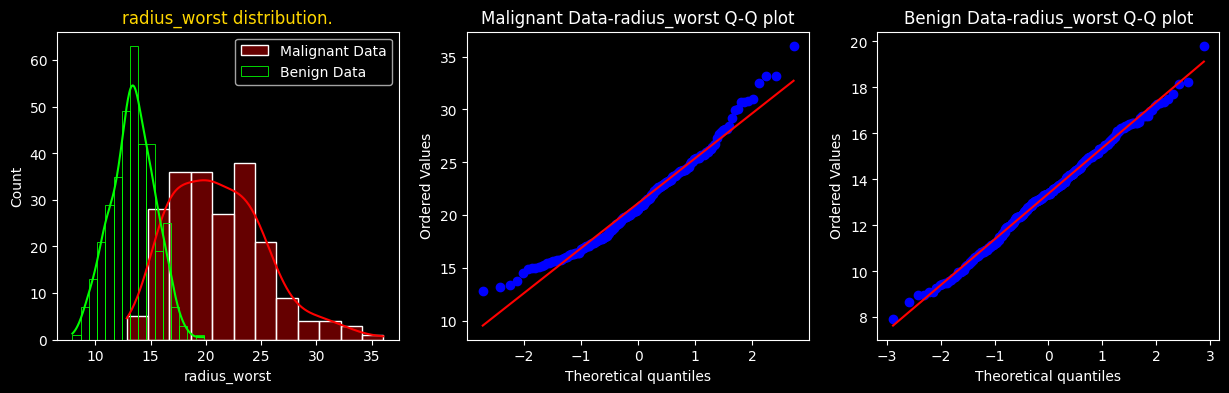

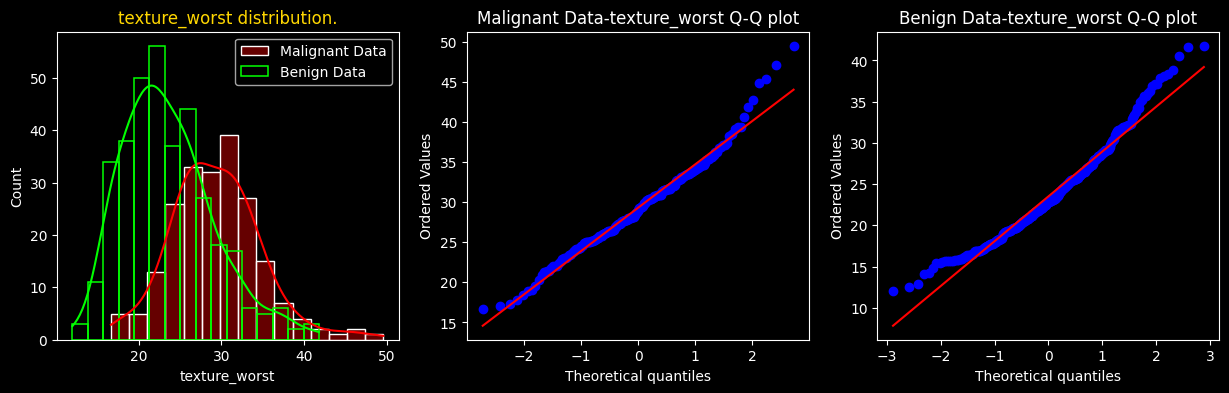

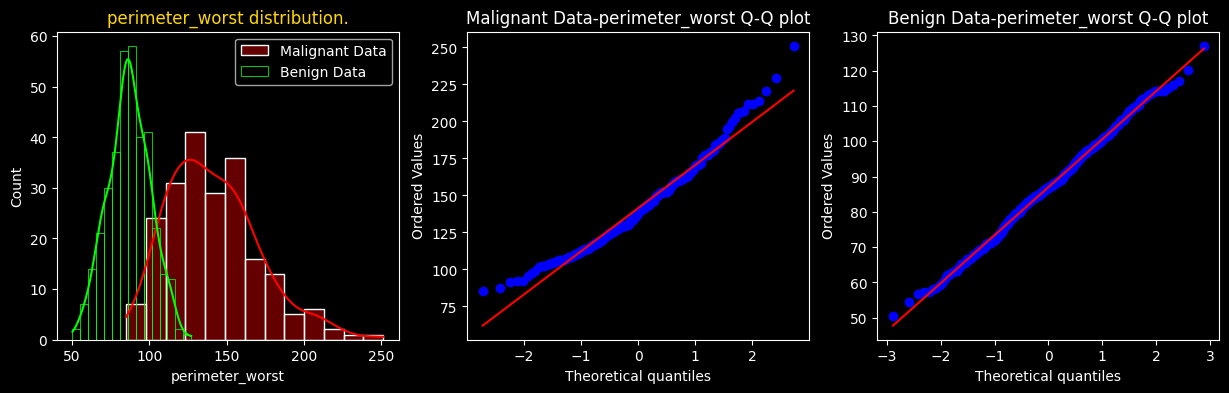

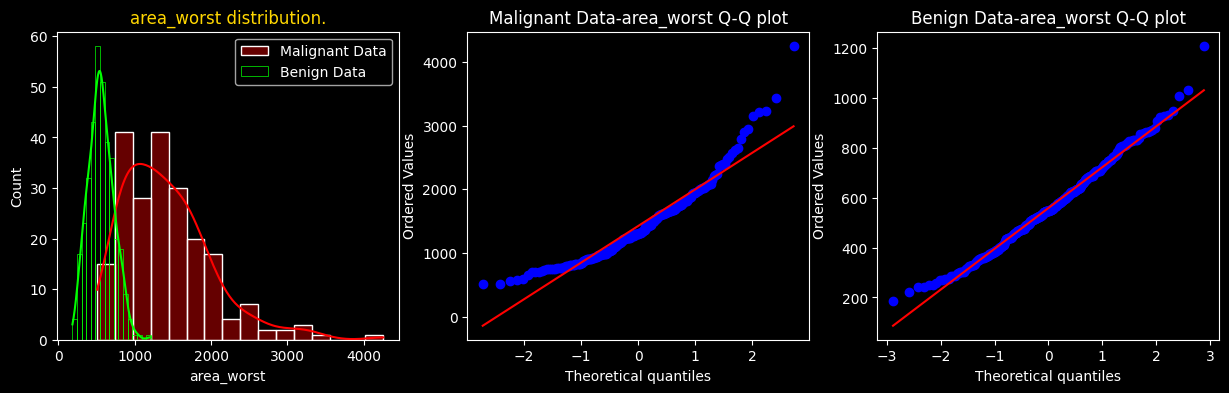

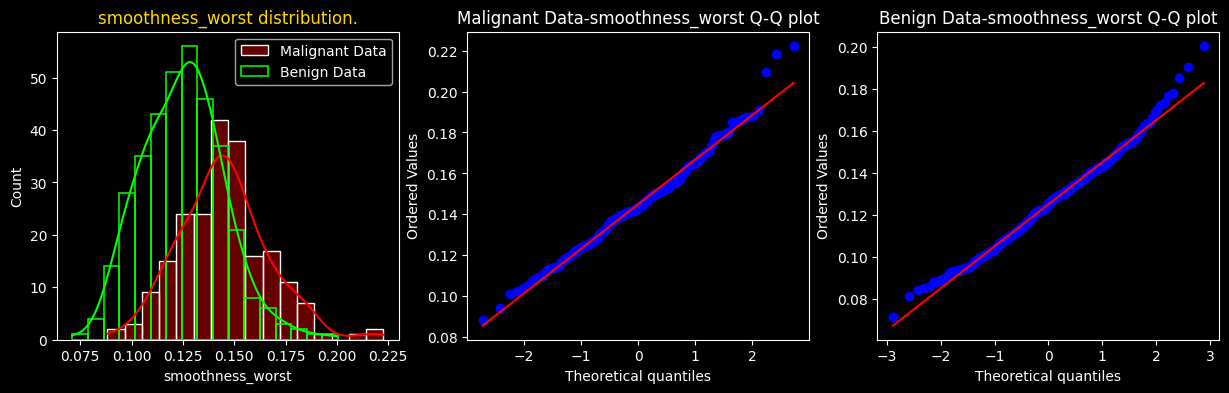

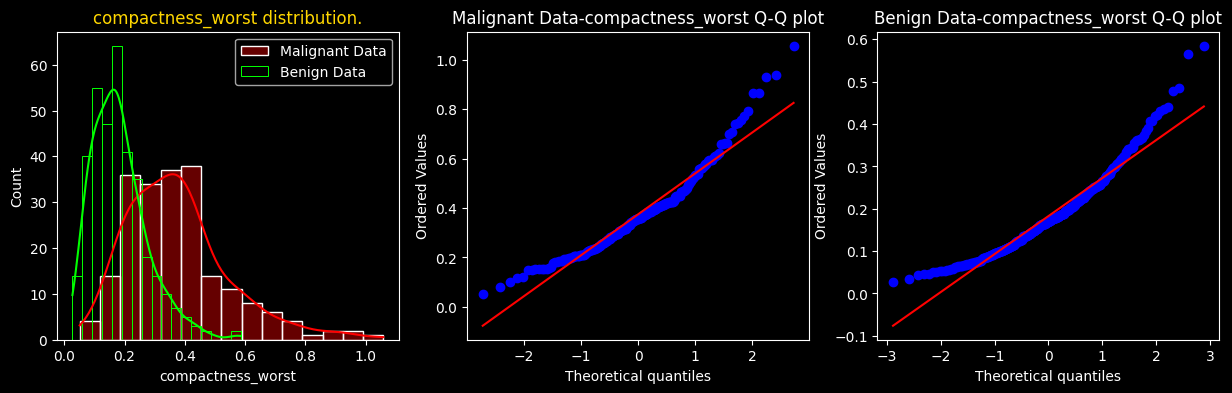

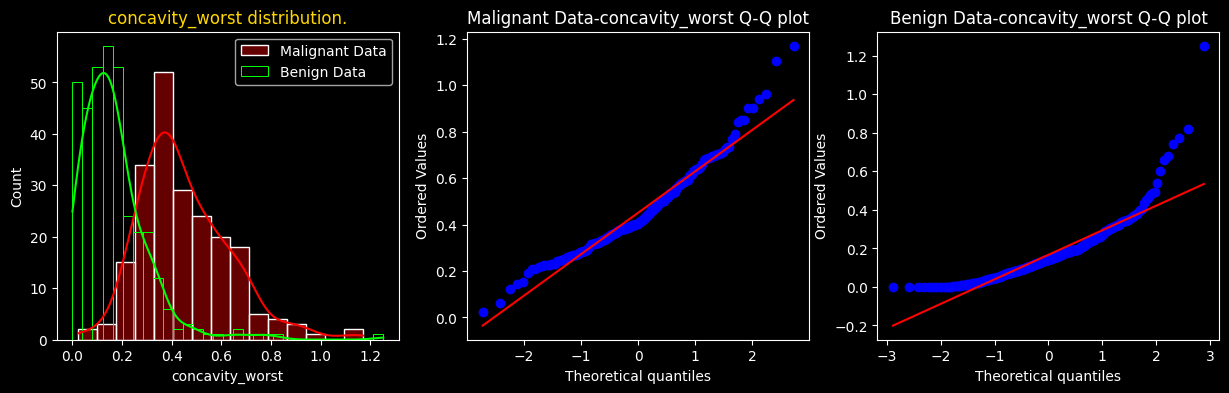

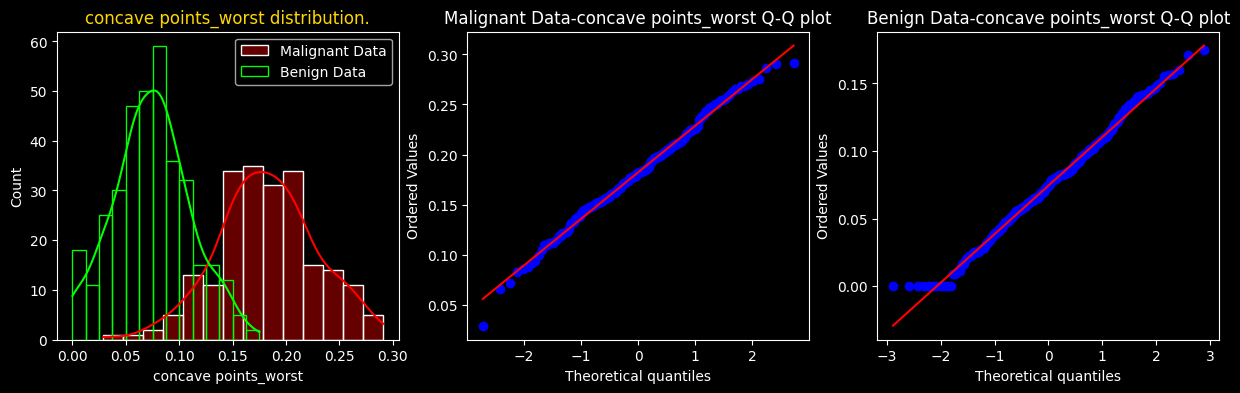

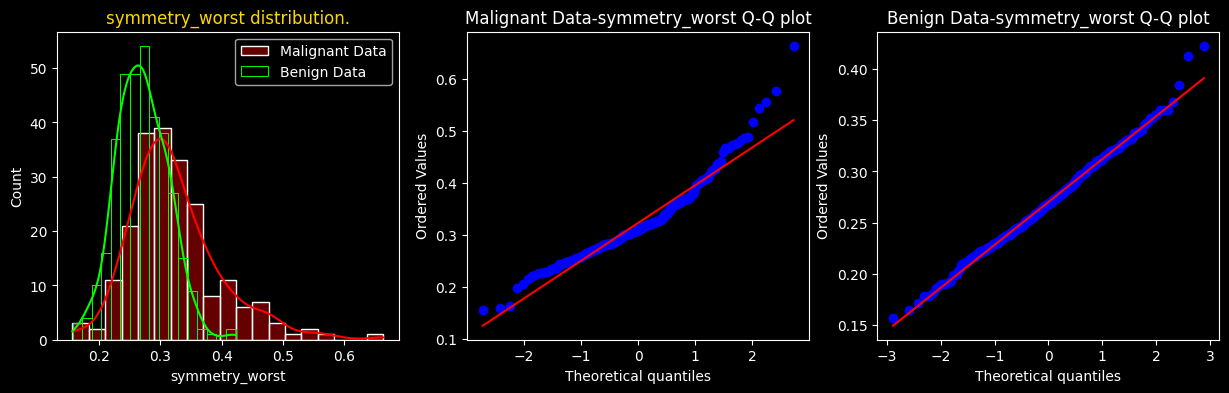

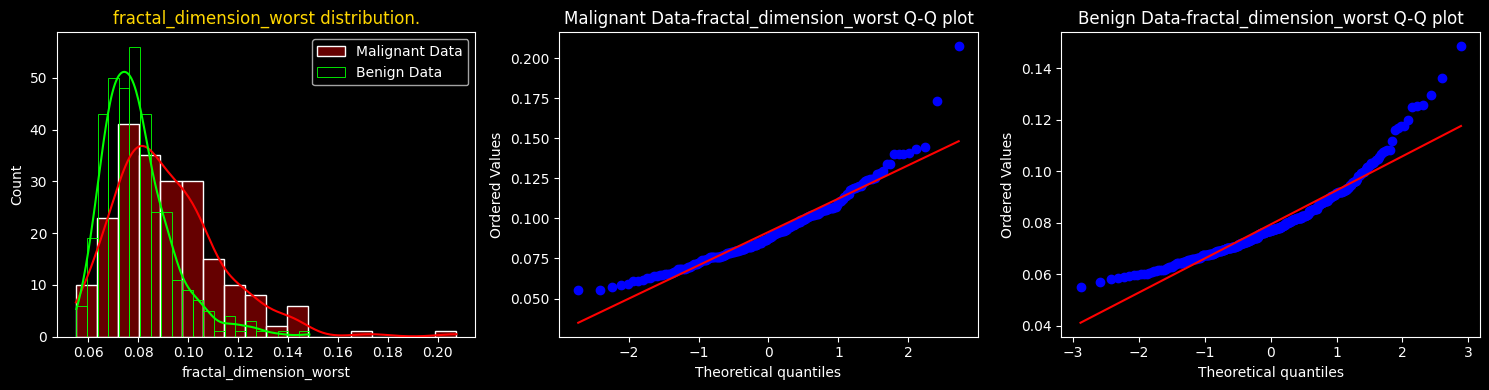

In [60]:
normality_check(mal_data, ben_data, worst_cols, "Malignant Data", "Benign Data")

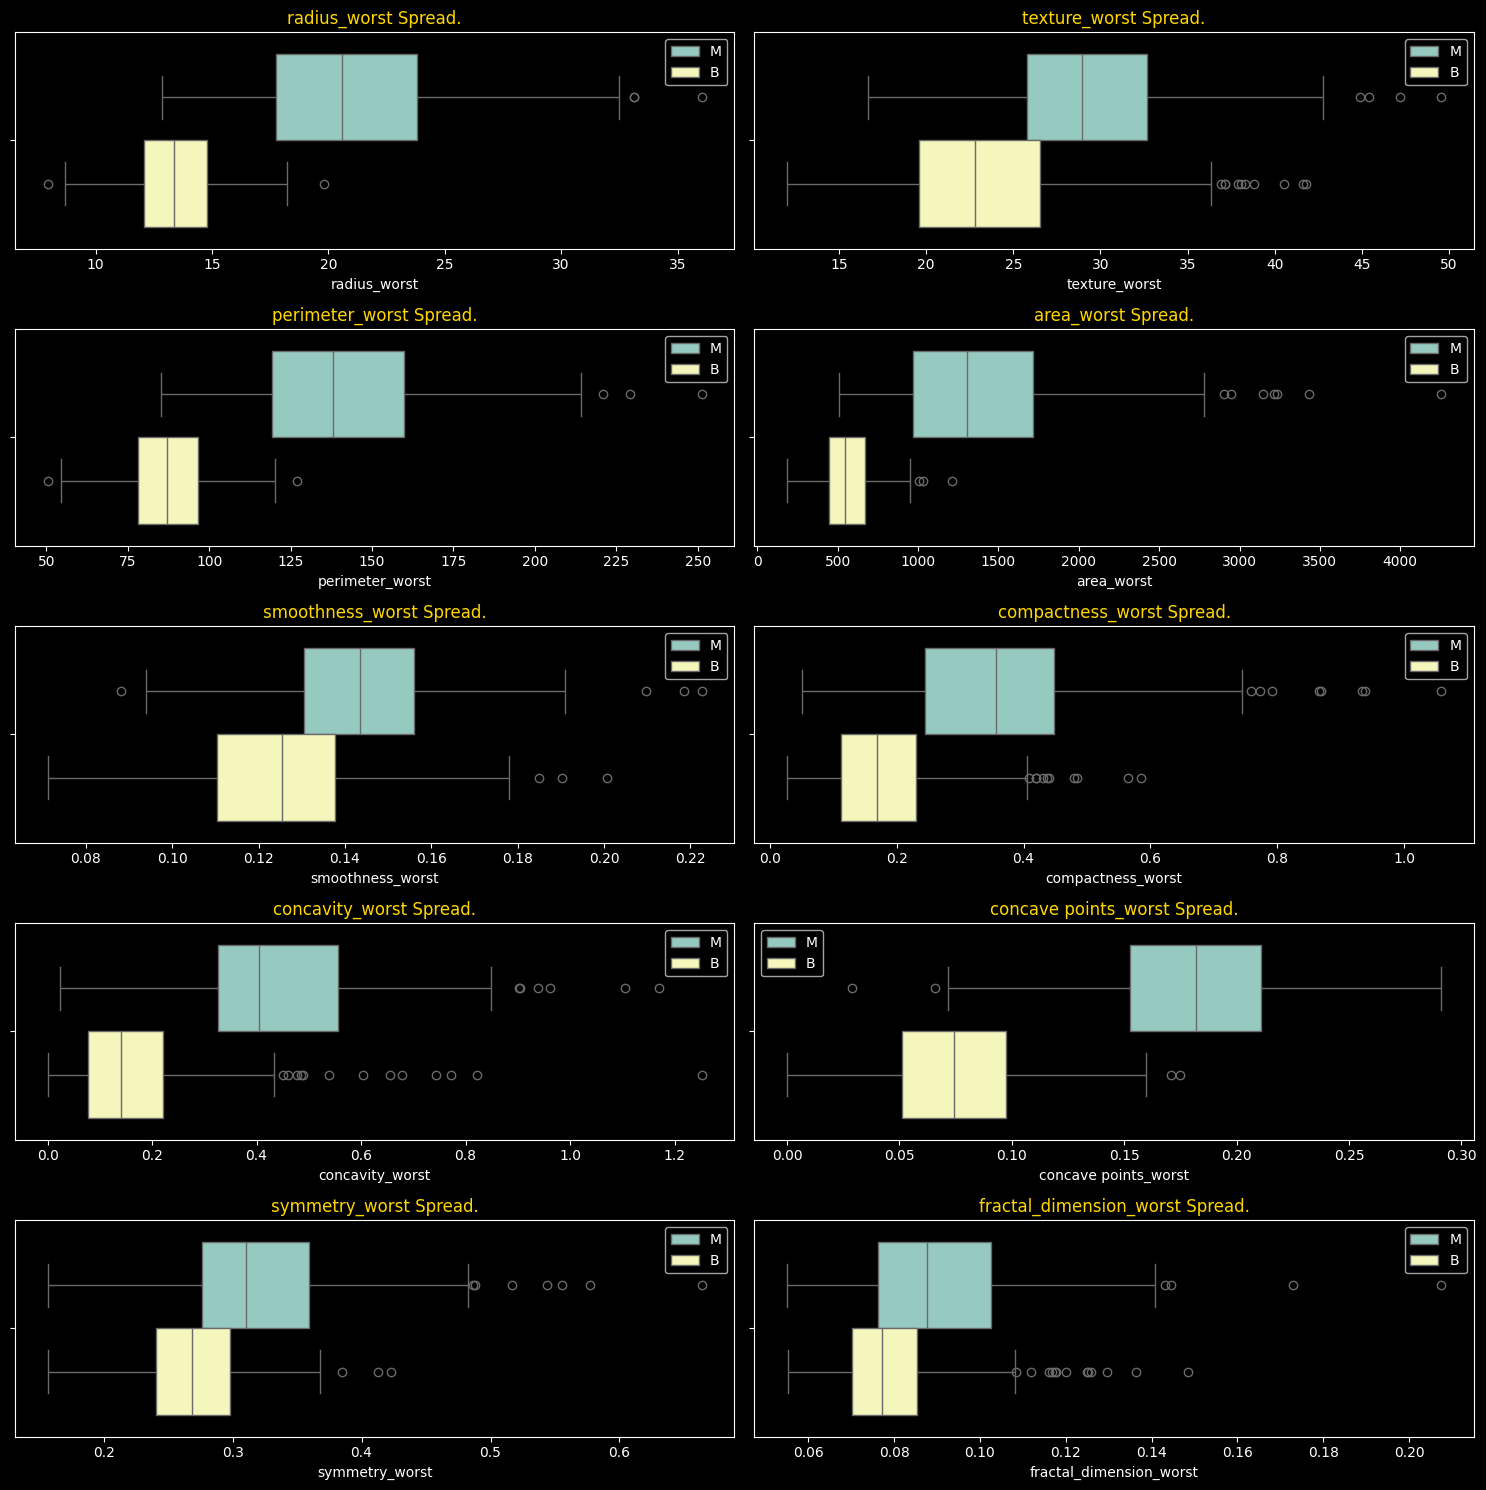

**************************************************************************************************** 


Levene's test statistic for radius_worst: 132.6601
p-Value: 0.0000
radius_worst in Malignant Data and Benign Data have unequal variance!!

test statistic: 24.8297
t test p-value: 0.0000

Mean of radius_worst in Malignant Data and Benign Data are different and statistically significant.



Levene's test statistic for texture_worst: 0.0860
p-Value: 0.7694
texture_worst in Malignant Data and Benign Data have equal variance.

test statistic: 12.2310
t test p-value: 0.0000

Mean of texture_worst in Malignant Data and Benign Data are different and statistically significant.



Levene's test statistic for perimeter_worst: 128.0836
p-Value: 0.0000
perimeter_worst in Malignant Data and Benign Data have unequal variance!!

test statistic: 25.3322
t test p-value: 0.0000

Mean of perimeter_worst in Malignant Data and Benign Data are different and statistically significant.



Levene's test stati

In [61]:
variance_check(data, "diagnosis", worst_cols, mal_data, ben_data, "Malignant Data", "Benign Data")

<div style = "background-color: red; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Conclusion from Independent t-test -------------------> worst data 

<pre style = "color: pink">

All the columns mean are differed and is statistically significant between the group.

>> This is a tirtiary strong suggestion method for tumor as well.



<div style = "background-color: #8277a1; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Report ------------------> se Data


<div style = "color:lime">

---

</div>

<pre style = "color: yellow">

The evaluation of the “worst” (maximum) feature set further strengthens the diagnostic 
framework by providing a tertiary level of confirmation in tumor assessment. 

Statistical analysis revealed that all the mean values of the worst columns differ 
significantly between the two patient groups, indicating that these extreme feature 
values carry substantial discriminative power in distinguishing malignant from benign cases.

The “worst” features (e.g., radius_worst, area_worst, perimeter_worst, compactness_worst, etc.) 
represent the most abnormal or extreme measurements observed within a given patient’s cell sample. 

These parameters effectively capture the peak morphological distortions—such as enlarged nuclei, 
irregular cell boundaries, and higher concavity—that are commonly associated with malignant 
transformation.


Because tumor progression often leads to an increase in these extreme structural abnormalities, 
the consistent statistical significance of the worst features across groups implies that they 
serve as robust tertiary diagnostic indicators. 

When used in conjunction with the mean and standard error (SE) parameters, the worst data enhances 
diagnostic accuracy by capturing the highest degree of abnormality present in the tissue.

In summary, the worst feature measurements provide a tertiary, strong diagnostic confirmation 
of tumor presence. 

Their statistical distinctiveness reinforces the interpretation derived from the mean and 
SE features, forming a comprehensive, multi-level diagnostic model where:

1) Mean features describe the general cell structure,
2) SE features reflect internal variability among cells, and
3) Worst features highlight the most extreme abnormalities

---- thereby offering a complete and reliable diagnostic framework for tumor identification.

</pre>

<div style = "color:lime">


---

</div>



<pre>

Now, let's see the correlation of the data, before that, the diagnosis, we will convert it to a numerical 
one, so that the correlation can be seen there!!



In [62]:
df = data.copy()

In [63]:
df['diagnosis'] = df['diagnosis'].map({"M": 1, "B": 0})

In [64]:
df.sample()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
12          1        19.17          24.8           132.4     1123.0   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
12           0.0974            0.2458          0.2065               0.1118   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
12         0.2397  ...         20.96          29.94            151.7   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
12      1332.0            0.1037             0.3903           0.3639   

    concave points_worst  symmetry_worst  fractal_dimension_worst  
12                0.1767          0.3176                   0.1023  

[1 rows x 31 columns]

In [65]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

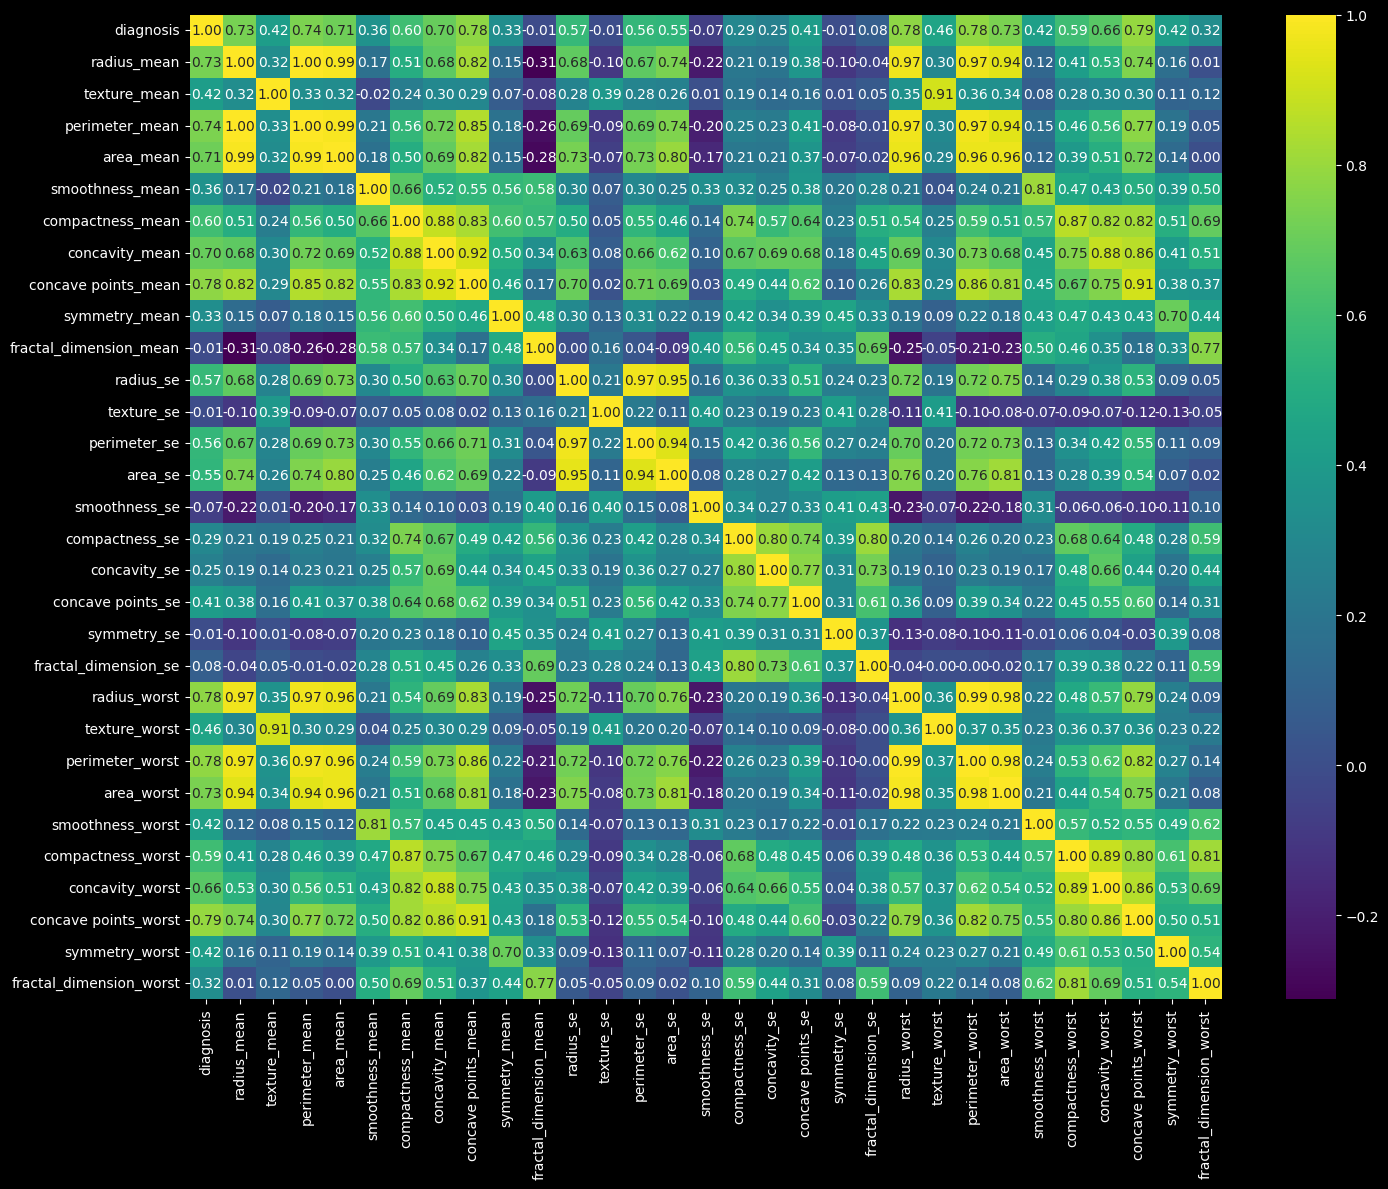

In [66]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

<pre style = "color: gold">
From this correlation as well, you can clearly see the strong relation between diagnossis and size and shape irregualrity 
of the nuclei.

>> Even though it will not tell us whether this relationship could have arisen just by random chance.


>> So, the columns we are claiming having a strong relationship is:

1) radius_mean
2) perimeter_mean
3) area_mean

4) concavity_mean
5) concave points_mean


>> We can do a Pearson correlation significance test for that!


</pre>


In [67]:
df[['diagnosis', 'radius_mean']].corr()

diagnosis  radius_mean
diagnosis     1.000000     0.730029
radius_mean   0.730029     1.000000

<div style = "background-color: red; border-radius: 10px; height: 50px; font-color: white; width: 90%;
text-align: center; align-items: center; font-size: 20px; display: flex; justify-content: center">
Pearson Correlation Significance Test

In [68]:
from scipy.stats import pearsonr

In [69]:
def pearson_test(df, feat, tar):
    r, p = pearsonr(df[feat], df[tar])
    print(f"Pearson coefficient: {r:.3f}\t and p-value is: {p:.3e}\n\n")

    if p<0.05:
        print(colored(f"Correlation between {feat} and {tar} is statistically significant\n\n", "green"))
        print("*"*100)
    else:
        print(colored(f"The correlation between your {feat} and {tar} is not significant.\
              \nYou see it only because of the randomness int he data!\n\n", "red"))
        print("*"*100)

In [70]:
pearson_test(df, 'radius_mean', 'diagnosis' )
pearson_test(df, 'perimeter_mean', 'diagnosis' )
pearson_test(df, 'area_mean', 'diagnosis' )
pearson_test(df, 'concavity_mean', 'diagnosis' )
pearson_test(df, 'concave points_mean', 'diagnosis' )

Pearson coefficient: 0.730	 and p-value is: 8.466e-96


Correlation between radius_mean and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.743	 and p-value is: 8.436e-101


Correlation between perimeter_mean and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.709	 and p-value is: 4.735e-88


Correlation between area_mean and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.696	 and p-value is: 9.967e-84


Correlation between concavity_mean and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.777	 and p-value is: 7.101e-116


Co

In [71]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [72]:
pearson_test(df, 'diagnosis', 'texture_mean')
pearson_test(df, 'diagnosis', 'smoothness_mean')
pearson_test(df, 'diagnosis', 'compactness_mean')
pearson_test(df, 'diagnosis', 'symmetry_mean')
pearson_test(df, 'diagnosis', 'fractal_dimension_mean')

Pearson coefficient: 0.415	 and p-value is: 4.059e-25


Correlation between diagnosis and texture_mean is statistically significant


****************************************************************************************************
Pearson coefficient: 0.359	 and p-value is: 1.052e-18


Correlation between diagnosis and smoothness_mean is statistically significant


****************************************************************************************************
Pearson coefficient: 0.597	 and p-value is: 3.938e-56


Correlation between diagnosis and compactness_mean is statistically significant


****************************************************************************************************
Pearson coefficient: 0.330	 and p-value is: 5.733e-16


Correlation between diagnosis and symmetry_mean is statistically significant


****************************************************************************************************
Pearson coefficient: -0.013	 and p-value is: 7.599e-

<pre style="color: lime">
Now let's check for the Box plot distribution of the data.



In [73]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

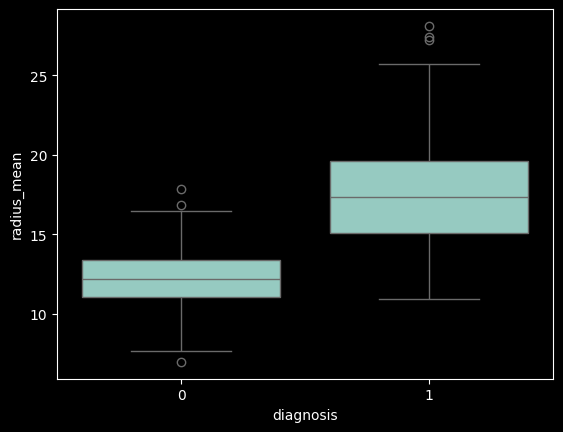

In [74]:
sns.boxplot(df, x = 'diagnosis', y = 'radius_mean')

<Axes: ylabel='radius_mean'>

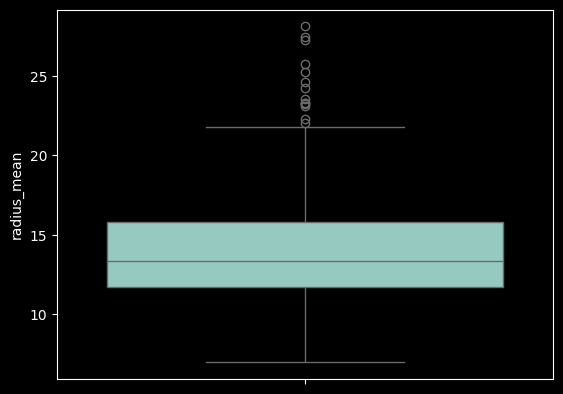

In [75]:
sns.boxplot(df['radius_mean'])

In [76]:
df.sample()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
527          0        12.34         12.27           78.94      468.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
527          0.09003           0.06307         0.02958              0.02647   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
527         0.1689  ...         13.61          19.27            87.22   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
527       564.9            0.1292             0.2074           0.1791   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
527                 0.107           0.311                  0.07592  

[1 rows x 31 columns]

<Axes: >

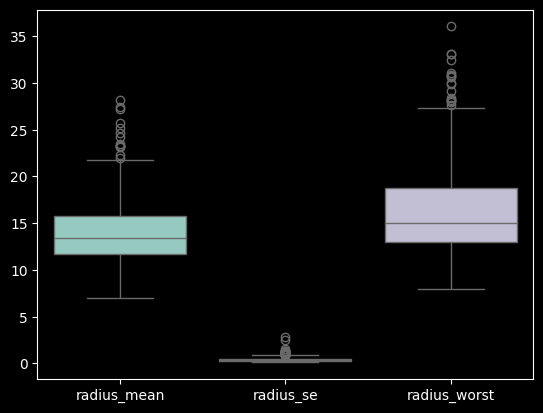

In [77]:
sns.boxplot(df[['radius_mean', 'radius_se', 'radius_worst']])

<pre style = "color: skyblue">
- Even though this box plot is good, I want this plot again to split by Malignant and Benign

- But in-order to do so, I want my data in a long format, to take all the variables with me.

- That means, I have to melt my data.

In [78]:
melted_df = df.melt(id_vars = 'diagnosis', 
                    value_vars = ['radius_mean', 'radius_se', 'radius_worst'], 
                    var_name = 'Radius_type', 
                    value_name = 'Value')

<Axes: xlabel='Radius_type', ylabel='Value'>

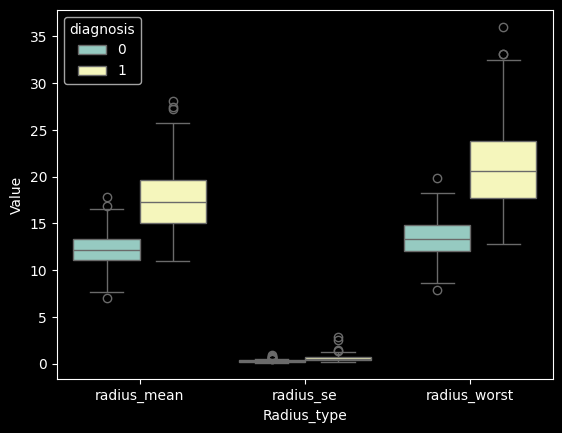

In [79]:
sns.boxplot(data = melted_df, x = 'Radius_type', y = 'Value', hue = 'diagnosis')

<pre style = "color: pink">
- Here you can see there are some outliers in the Radisu type, even after we split it into Malignant and Benign.

- So, in a combined data, the outliers will be more, 
- and we cannot ignore the outliers, because it really shows some extreme tumors, which we don't want to neglate.

>> So, in this case, for a statistical test, insitead of pearson correlation coefficient, 
   we will take spearman correlation coefficient. 

   Spearmanr will consider the continuous values as some rank and it will not get affected by the outliers.

   

<pre style="background-color:red; border-radius: 50px; width: 90%; font-color: white; justify-content: center;
display: flex; height: 50px;align-items: center;font-size: 25px; font-weight: bold">
Spearman's Correlation Significance Test

In [80]:
from scipy.stats import spearmanr, kendalltau

In [81]:
def spearman_test(feat, tar):
    r, p = spearmanr(feat, tar)
    print(f"Spearman correlation coefficent b/w your {feat.name} and {tar.name} is: {r:.3f}\
          \np-Value will be: \t{p:.3e}\n\n")
    
    if p<0.05:
        print(colored(f"There is a significant relation between your {feat.name} and {tar.name}\n", "green"))
        print("*"*100)
    else:
        print(colored(f"There is no significant relation between your {feat.name} and {tar.name}\n", "red"))
        print("*"*100)
    


In [82]:
for i in mean_cols:
    spearman_test(df[i], df['diagnosis'])

Spearman correlation coefficent b/w your radius_mean and diagnosis is: 0.733          
p-Value will be: 	7.219e-97


There is a significant relation between your radius_mean and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your texture_mean and diagnosis is: 0.462          
p-Value will be: 	2.000e-31


There is a significant relation between your texture_mean and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your perimeter_mean and diagnosis is: 0.748          
p-Value will be: 	3.163e-103


There is a significant relation between your perimeter_mean and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your area_mean and diagnosis is: 0.734          
p-Value will be: 	2.162e-97


There 

In [83]:
from termcolor import colored

<pre style="background-color:red; border-radius: 50px; width: 90%; font-color: white; justify-content: center;
display: flex; height: 50px;align-items: center;font-size: 25px; font-weight: bold">
KendallTau's Correlation Significance Test

In [84]:
def kendalltau_test(feat, tar):
    r, p = kendalltau(feat, tar)
    print(f"KendallTau correlation coefficent b/w your {feat.name} and {tar.name} is: {r:.3f}\
          \np-Value will be: \t{p:.3e}\n\n")
    
    if p<0.05:
        print(colored(f"There is a significant relation between your {feat.name} and {tar.name}\n", "green"))
        print("*"*100)
    else:
        print(colored(f"There is no significant relation between your {feat.name} and {tar.name}\n", "red"))
        print("*"*100)
    


In [85]:
for i in mean_cols:
    kendalltau_test(df[i], df['diagnosis'])

KendallTau correlation coefficent b/w your radius_mean and diagnosis is: 0.599          
p-Value will be: 	2.681e-68


There is a significant relation between your radius_mean and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your texture_mean and diagnosis is: 0.378          
p-Value will be: 	3.419e-28


There is a significant relation between your texture_mean and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your perimeter_mean and diagnosis is: 0.612          
p-Value will be: 	3.537e-71


There is a significant relation between your perimeter_mean and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your area_mean and diagnosis is: 0.600          
p-Value will be: 	1.533e-68



<pre style = "color: pink">
Now, I will repeat this test for _se and _worst columns as well, 

>> That means, I will test, all Pearson, Spearman and KendallTau test!



In [86]:
for i in se_cols:
    pearson_test(df, i, 'diagnosis')

Pearson coefficient: 0.567	 and p-value is: 9.739e-50


Correlation between radius_se and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: -0.008	 and p-value is: 8.433e-01


The correlation between your texture_se and diagnosis is not significant.              
You see it only because of the randomness int he data!


****************************************************************************************************
Pearson coefficient: 0.556	 and p-value is: 1.652e-47


Correlation between perimeter_se and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.548	 and p-value is: 5.896e-46


Correlation between area_se and diagnosis is statistically significant


****************************************************************************************************


In [87]:
for i in se_cols:
    spearman_test(df[i], df['diagnosis'])

Spearman correlation coefficent b/w your radius_se and diagnosis is: 0.617          
p-Value will be: 	5.771e-61


There is a significant relation between your radius_se and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your texture_se and diagnosis is: 0.019          
p-Value will be: 	6.439e-01


There is no significant relation between your texture_se and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your perimeter_se and diagnosis is: 0.630          
p-Value will be: 	2.284e-64


There is a significant relation between your perimeter_se and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your area_se and diagnosis is: 0.714          
p-Value will be: 	6.704e-90


There is a significa

In [88]:
for i in se_cols:
    kendalltau_test(df[i], df['diagnosis'])

KendallTau correlation coefficent b/w your radius_se and diagnosis is: 0.504          
p-Value will be: 	6.193e-49


There is a significant relation between your radius_se and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your texture_se and diagnosis is: 0.016          
p-Value will be: 	6.435e-01


There is no significant relation between your texture_se and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your perimeter_se and diagnosis is: 0.515          
p-Value will be: 	5.079e-51


There is a significant relation between your perimeter_se and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your area_se and diagnosis is: 0.584          
p-Value will be: 	5.742e-65


There is a s

<pre>

So, you can confidently say that, all the columns except, Smoothness and Texture will affect the diagnosis!

>> This is something big you can say!!

>> Or in a waym you can say that all the columns except this smoothness and Texture is having a linear relationship with 
   the diagnosis.

>> As those will increase, your tumor can also increase, in a way!!



In [89]:
for i in worst_cols:
    pearson_test(df, i, 'diagnosis')

Pearson coefficient: 0.776	 and p-value is: 8.482e-116


Correlation between radius_worst and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.457	 and p-value is: 1.078e-30


Correlation between texture_worst and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.783	 and p-value is: 5.771e-119


Correlation between perimeter_worst and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.734	 and p-value is: 2.829e-97


Correlation between area_worst and diagnosis is statistically significant


****************************************************************************************************
Pearson coefficient: 0.421	 and p-value is: 6.575e-26




In [90]:
for i in worst_cols:
    spearman_test(df[i], df['diagnosis'])

Spearman correlation coefficent b/w your radius_worst and diagnosis is: 0.788          
p-Value will be: 	1.678e-121


There is a significant relation between your radius_worst and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your texture_worst and diagnosis is: 0.477          
p-Value will be: 	1.263e-33


There is a significant relation between your texture_worst and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your perimeter_worst and diagnosis is: 0.796          
p-Value will be: 	6.743e-126


There is a significant relation between your perimeter_worst and diagnosis

****************************************************************************************************
Spearman correlation coefficent b/w your area_worst and diagnosis is: 0.787          
p-Value will be: 	5.642e-121

In [91]:
for i in worst_cols:
    kendalltau_test(df[i], df['diagnosis'])

KendallTau correlation coefficent b/w your radius_worst and diagnosis is: 0.644          
p-Value will be: 	1.130e-78


There is a significant relation between your radius_worst and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your texture_worst and diagnosis is: 0.390          
p-Value will be: 	6.498e-30


There is a significant relation between your texture_worst and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your perimeter_worst and diagnosis is: 0.651          
p-Value will be: 	2.570e-80


There is a significant relation between your perimeter_worst and diagnosis

****************************************************************************************************
KendallTau correlation coefficent b/w your area_worst and diagnosis is: 0.643          
p-Value will be: 	1.79

<pre>

So, for the worst_measurements, all of the columns do have a significant relatonship with the diagnosis, 

>> That means, you can say, increase in those values, tend to cause malignant nuclei!!



<br><br><br>

In [92]:
melted_df

diagnosis   Radius_type   Value
0             1   radius_mean  17.990
1             1   radius_mean  20.570
2             1   radius_mean  19.690
3             1   radius_mean  11.420
4             1   radius_mean  20.290
...         ...           ...     ...
1702          1  radius_worst  25.450
1703          1  radius_worst  23.690
1704          1  radius_worst  18.980
1705          1  radius_worst  25.740
1706          0  radius_worst   9.456

[1707 rows x 3 columns]

In [93]:
pd.crosstab(melted_df['diagnosis'], melted_df['Radius_type'])

Radius_type  radius_mean  radius_se  radius_worst
diagnosis                                        
0                    357        357           357
1                    212        212           212

<pre style = "color: lime">

So, after all these tests, we know a thing for sure, there is a linear relationship, even though there are some 
outliers in it.

Either we can just ignore the outliers and can go with the modelling using a linear model or we can go with 
any other robust model, which don't care about the linear relationship.


“Either ignore/handle outliers and use a linear model,
or go with a robust, non-linear model that doesn’t care about linearity.”

>> So, there is a trade-off between interpretability and robustness!!



</pre>



<pre style = "color: magenta">

Pearson correlation with a binary variable is mathematically equivalent to a point-biserial correlation.

That itself is equivalent to a t-test on group means — so you’re already covering the logic those other tests rely on.

You only need Pearson/Spearman (or Kendall) for association here.

❌ No need for Chi-square or ANOVA — they don’t add new insight in your binary + continuous setup.

Running ANOVA or Chi-square here would just reproduce what correlation already tells you, but in a more 
complicated way — hence, “overdoing it.”

you’re not just avoiding overdoing it, you’re being methodologically correct.




In [94]:
df.sample()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
203          1        13.81         23.75           91.56      597.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
203           0.1323            0.1768          0.1558              0.09176   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
203         0.2251  ...          19.2          41.85            128.5   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
203      1153.0            0.2226             0.5209           0.4646   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
203                0.2013          0.4432                   0.1086  

[1 rows x 31 columns]

# Let's move to Modelling of the data

<pre style = "color: salmon">

>> Shall I take all the columns and then do a ML model?

>> To answer this, let's see how correlated is your _mean, _se and _worst data is.

>> If these columns are highly correlated, (multi-collinearity), then it can confuse linear models and inflate varaince.

>> So, we will go-check this correlation.



In [95]:
df[['radius_mean', 'radius_se', 'radius_worst']].corr()

radius_mean  radius_se  radius_worst
radius_mean      1.000000   0.679090      0.969539
radius_se        0.679090   1.000000      0.715065
radius_worst     0.969539   0.715065      1.000000

<Axes: >

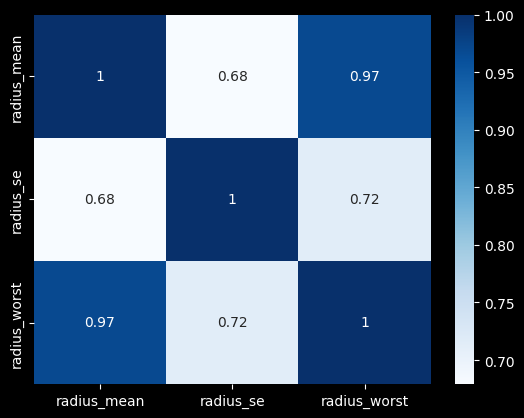

In [96]:
sns.heatmap(df[['radius_mean', 'radius_se', 'radius_worst']].corr(), annot = True, cmap= 'Blues')

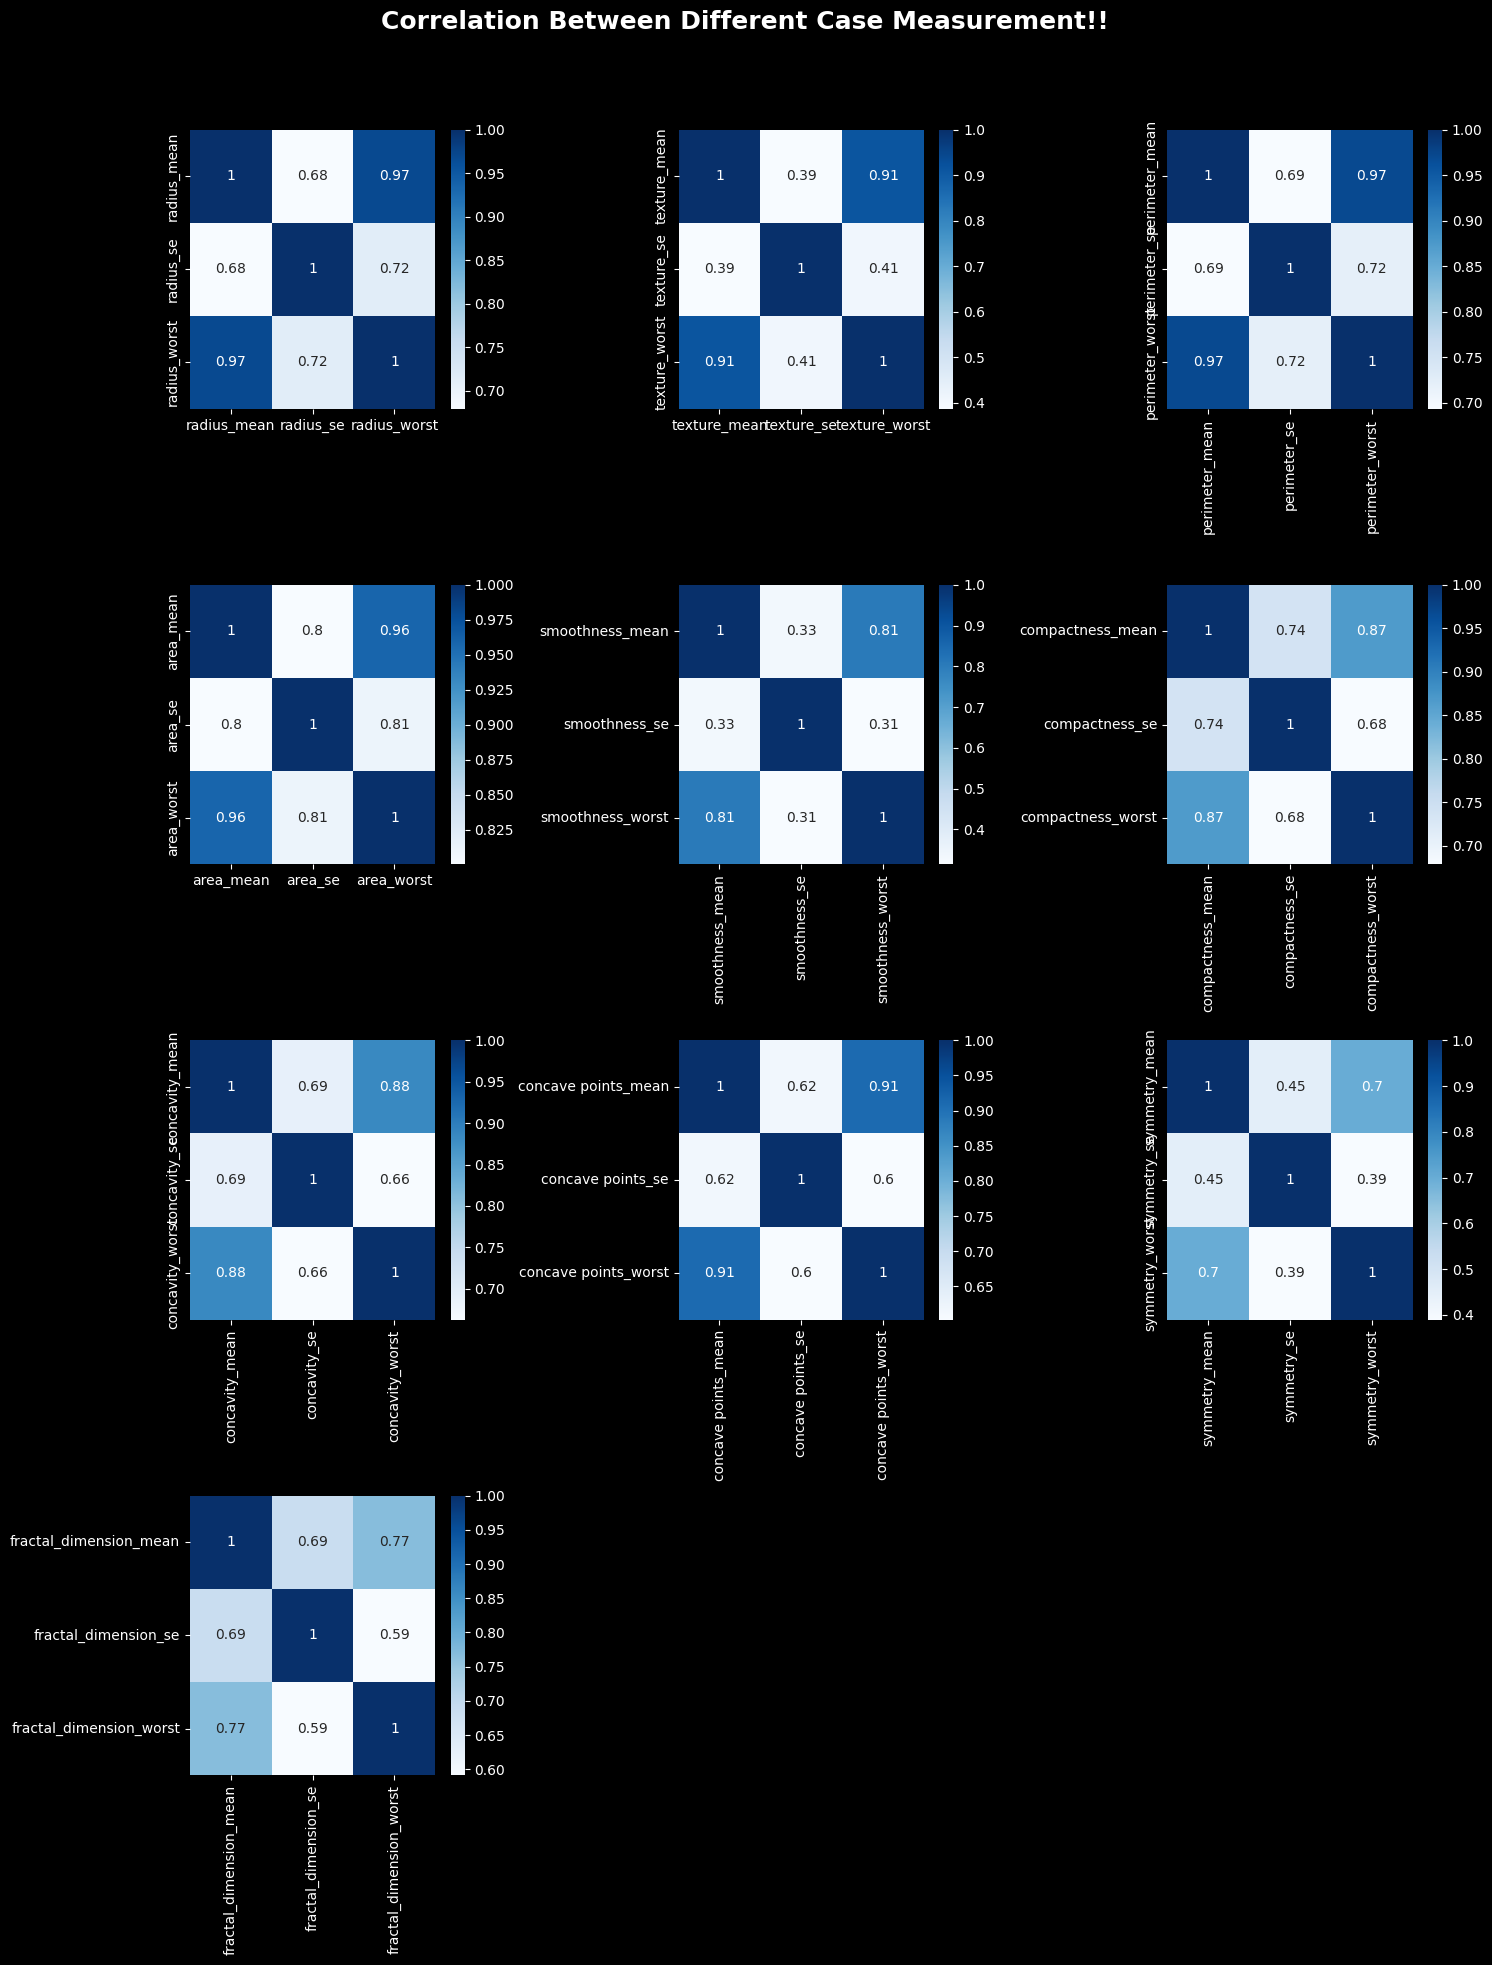

In [97]:
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle("Correlation Between Different Case Measurement!!", fontsize = 18, fontweight= 'bold')
ax = ax.flatten()

for c, (i, j, k) in enumerate(zip(mean_cols, se_cols, worst_cols)):
    sns.heatmap(df[[i, j, k]].corr(), annot=True, cmap='Blues', ax = ax[c])

for j in range((c+1), len(ax)):
    plt.delaxes(ax[j])
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

<pre style="color: lime">
>> From this we can now reach to a decision, which is:

> Take only the data for mean 
> and then create a model on that!

> In case, if you want to give parameters on the model for the "worst" case, 
  you can still do that, as the result will be mostly same.

> THe above mentioned statements are true if you're looking for interpretations 
  uisng a linear model.

> If you're looking for a Tree based model or ensemble model and don't want the 
  interpretability, all features can be still included.


---

---

<br><br>

In [98]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [99]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<Axes: >

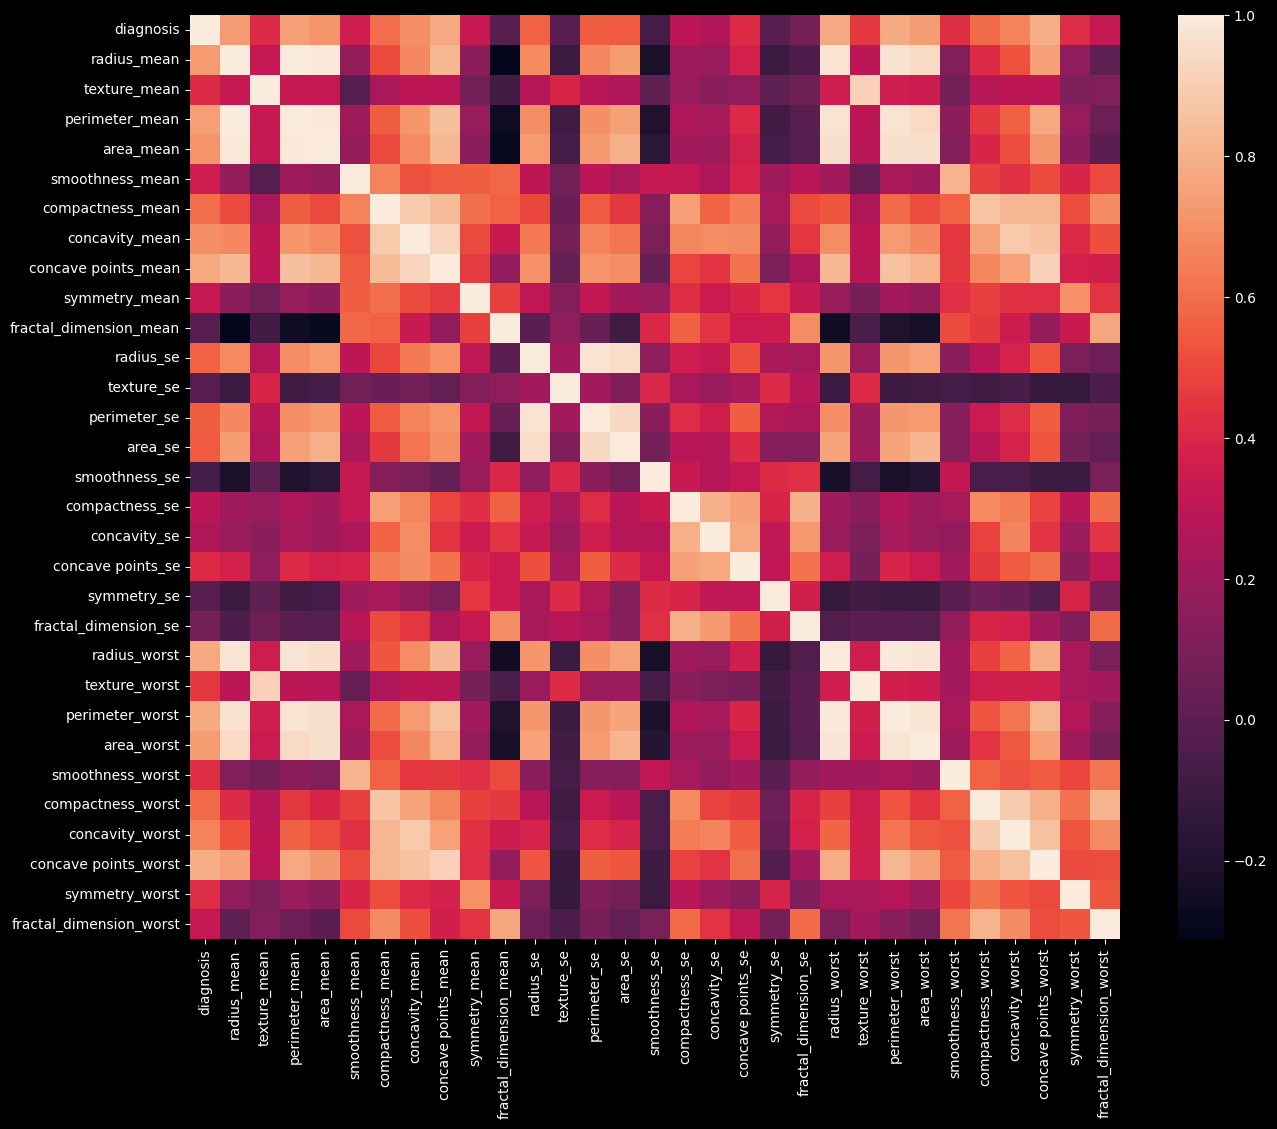

In [100]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr())

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [103]:
mean_data

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean diagnosis  
0                   0.07871         M  
1                   0.05667         M  
2                   0.05999         M  
3                   0.09744         M  
4                   0.05883         M  
..                      ...       ...  
564                 0.05623         M  
565                 0.05533         M  
566                 0.05648         M  
567                 0.07016         M  
568                 0.05884         B  

[569 rows x 11 columns]

<pre>

>> We intend to model with logistic regression first, 

- but just by looking at the data, we know that we should scale it, 
- otherwise, while converging a larger penalty will be given to the big guys!!



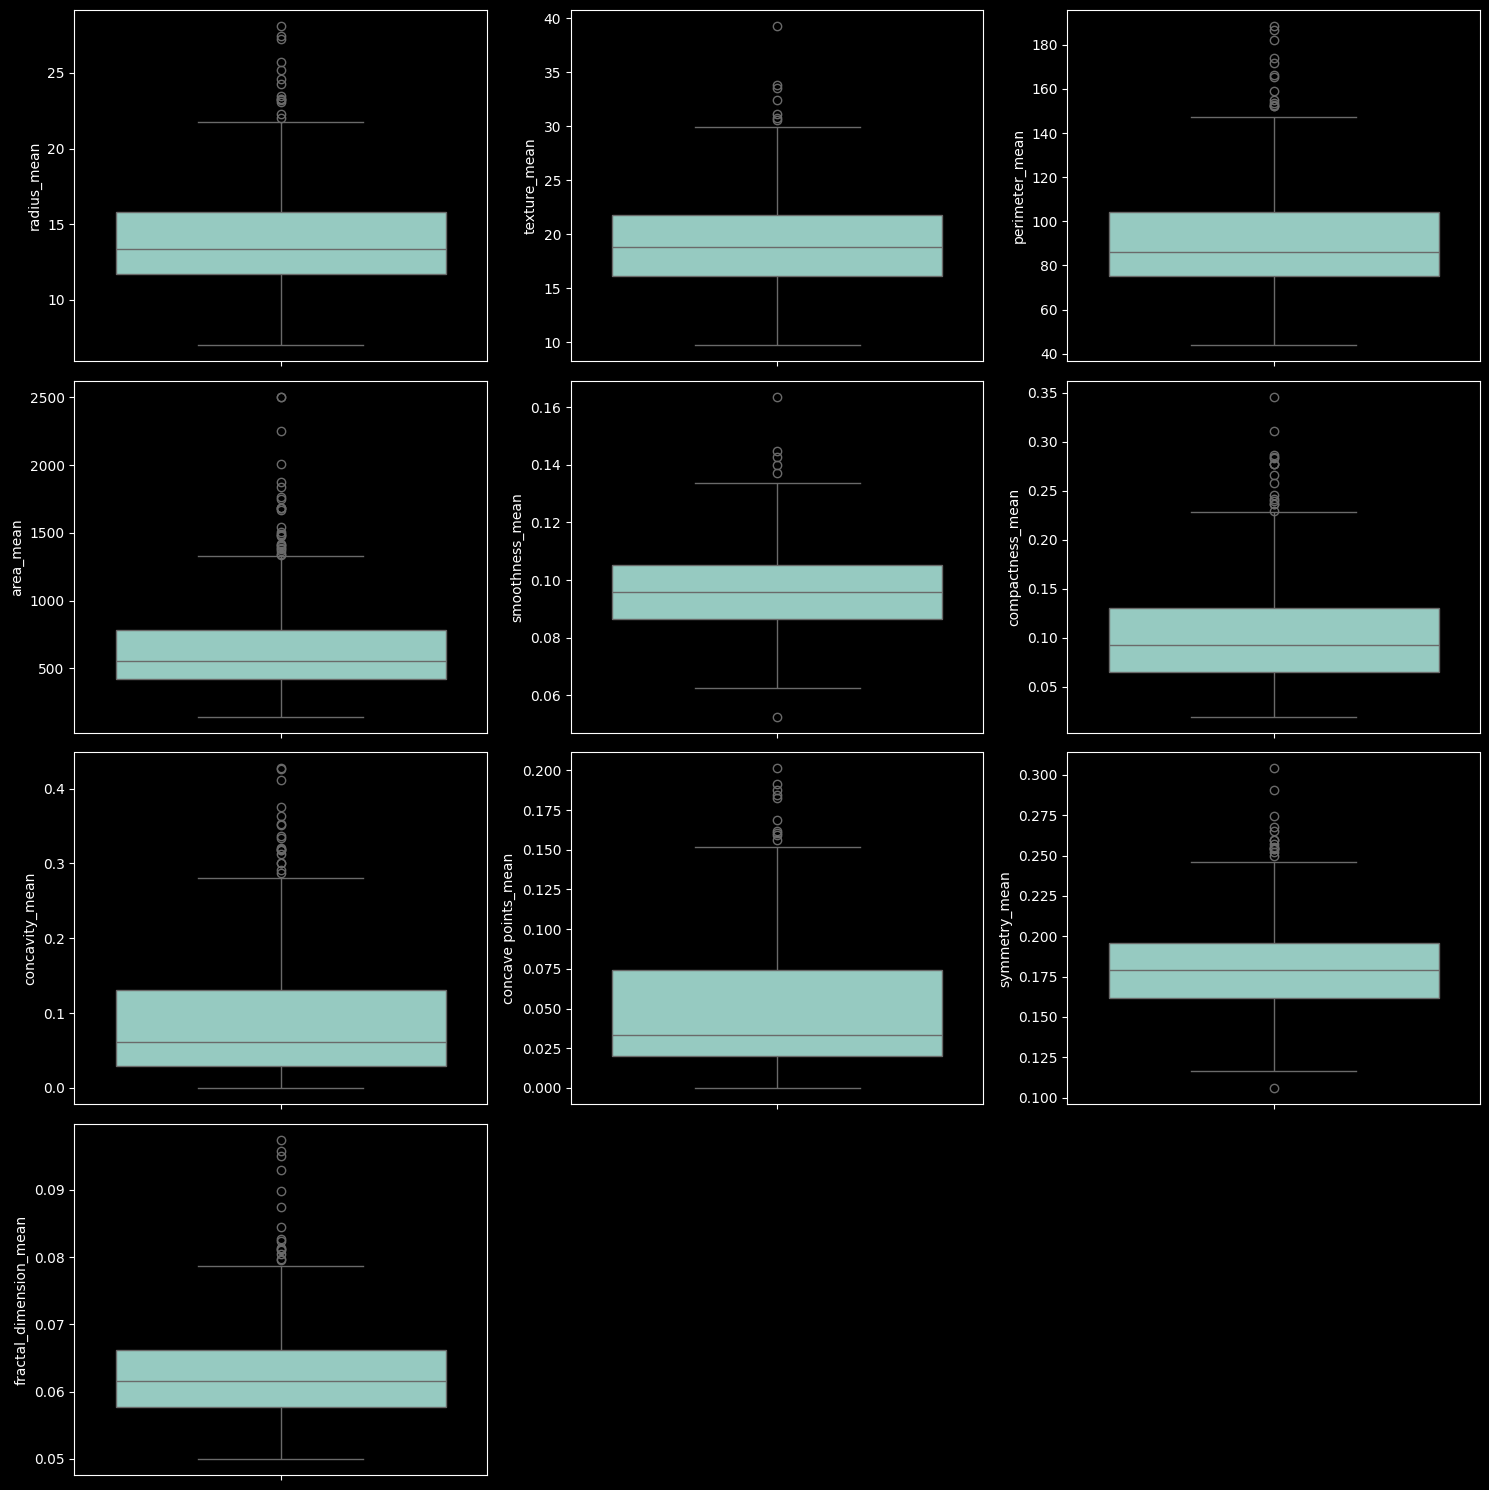

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.flatten()
for i, j in enumerate(mean_cols):
    sns.boxplot(mean_data[j], ax = ax[i])
for z in range((i+1), len(ax)):
    plt.delaxes(ax[z])
plt.tight_layout()
plt.show()0

In [108]:
mean_data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean diagnosis  
0                 0.07871         M  
1                 0.05667         M  
2                 0.05999         M  
3                 0.09744         M  
4                 0.05883         M

In [110]:
X, y = mean_data.iloc[:, :-1], mean_data.iloc[:, -1]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [114]:
y = y.map({"M":1, "B":0})

In [115]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)

In [131]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
467        9.668         18.10           61.06      286.3          0.08311   
295       13.770         13.27           88.06      582.7          0.09198   
545       13.620         23.23           87.19      573.2          0.09246   
485       12.450         16.41           82.85      476.7          0.09514   
117       14.870         16.67           98.64      682.5          0.11620   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
467           0.05428         0.01479             0.005769         0.1680   
295           0.06221         0.01063             0.019170         0.1592   
545           0.06747         0.02974             0.024430         0.1664   
485           0.15110         0.15440             0.048460         0.2082   
117           0.16490         0.16900             0.089230         0.2157   

     fractal_dimension_mean  
467                 0.06412  
295                 0.05912  
545                 0.05801  
485                 0.07325  
117                 0.06768

In [132]:
X_train.shape

(455, 10)

In [133]:
X_test.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
562        15.22         30.62          103.40      716.9          0.10480   
382        12.05         22.72           78.75      447.8          0.06935   
44         13.17         21.81           85.42      531.5          0.09714   
564        21.56         22.39          142.00     1479.0          0.11100   
149        13.74         17.91           88.12      585.0          0.07944   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
562           0.20870         0.25500              0.09429         0.2128   
382           0.10730         0.07943              0.02978         0.1203   
44            0.10470         0.08259              0.05252         0.1746   
564           0.11590         0.24390              0.13890         0.1726   
149           0.06376         0.02881              0.01329         0.1473   

     fractal_dimension_mean  
562                 0.07152  
382                 0.06659  
44                  0.06177  
564                 0.05623  
149                 0.05580

In [134]:
X_test.shape

(114, 10)

In [135]:
r_scale = RobustScaler()

In [136]:
X_train = r_scale.fit_transform(X_train)

In [138]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [139]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -0.851887     -0.132848       -0.849822  -0.706170        -0.684918   
1     0.115566     -1.011829        0.066520   0.099484        -0.243405   
2     0.080189      0.800728        0.036993   0.073661        -0.219512   
3    -0.195755     -0.440400       -0.110300  -0.188638        -0.086112   
4     0.375000     -0.393085        0.425590   0.370753         0.962170   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.596606       -0.441492            -0.519714      -0.340611   
1         -0.479063       -0.482125            -0.267745      -0.596798   
2         -0.401097       -0.295468            -0.168845      -0.387191   
3          0.838509        0.922153             0.282975       0.829694   
4          1.043059        1.064759             1.049544       1.048035   

   fractal_dimension_mean  
0                0.315480  
1               -0.273102  
2               -0.403767  
3                1.390230  
4                0.734550

In [140]:
X_test = pd.DataFrame(r_scale.transform(X_test), columns = X.columns)

In [141]:
X_test.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.457547      2.145587        0.587137   0.464257         0.394724   
1    -0.290094      0.707916       -0.249448  -0.267192        -1.369836   
2    -0.025943      0.542311       -0.023078  -0.039685         0.013440   
3     1.952830      0.647862        1.897166   2.535743         0.703335   
4     0.108491     -0.167425        0.068556   0.105735        -0.867596   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          1.692285        1.904767             1.144684       0.963610   
1          0.189283        0.189881            -0.068252      -1.729258   
2          0.150745        0.220746             0.359312      -0.148472   
3          0.316757        1.796347             1.983454      -0.206696   
4         -0.456088       -0.304552            -0.378302      -0.943231   

   fractal_dimension_mean  
0                1.186580  
1                0.606239  
2                0.038846  
3               -0.613302  
4               -0.663920

In [143]:
model_logist = LogisticRegression()

In [142]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(
 |      penalty='l2',
 |      *,
 |      dual=False,
 |      tol=0.0001,
 |      C=1.0,
 |      fit_intercept=True,
 |      intercept_scaling=1,
 |      class_weight=None,
 |      random_state=None,
 |      solver='lbfgs',
 |      max_iter=100,
 |      multi_class='deprecated',
 |      verbose=0,
 |      warm_start=False,
 |      n_jobs=None,
 |      l1_ratio=None
 |  )
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for opti

In [146]:
model_logist.fit(X_train, y_train)

LogisticRegression()

In [147]:
train_pred = model_logist.predict(X_train)

In [149]:
train_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [150]:
y_train[:10]

467    0
295    0
545    0
485    0
117    1
296    0
432    1
158    0
141    1
264    1
Name: diagnosis, dtype: int64

In [151]:
test_pred = model_logist.predict(X_test)

In [152]:
test_pred[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [153]:
y_test[:10]

562    1
382    0
44     1
564    1
149    0
123    0
274    1
309    0
232    0
448    0
Name: diagnosis, dtype: int64

In [154]:
accuracy_score(train_pred, y_train)

0.9472527472527472

In [155]:
accuracy_score(test_pred, y_test)

0.9298245614035088

In [156]:
confusion_matrix(train_pred, y_train)

array([[278,  17],
       [  7, 153]])

In [157]:
confusion_matrix(test_pred, y_test)

array([[68,  4],
       [ 4, 38]])

<Axes: >

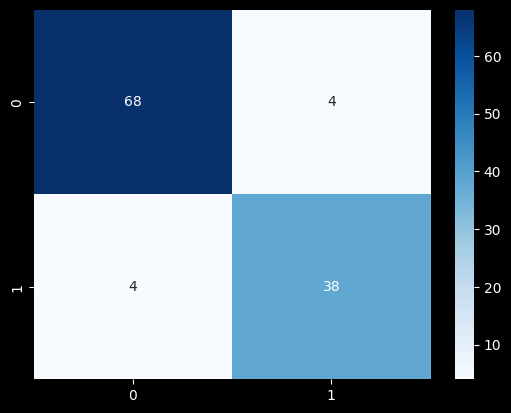

In [159]:
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap='Blues')

In [161]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [163]:
from sklearn.pipeline import Pipeline

In [164]:
model_log = Pipeline([("scaler", RobustScaler()),
                      ("model", LogisticRegression(
                          class_weight = "balanced", 
                          random_state=42
                      ))])


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [169]:
model_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [170]:
train_pred = model_log.predict(X_train)

In [172]:
test_pred = model_log.predict(X_test)

In [173]:
accuracy_score(y_train, train_pred)

0.9472527472527472

In [174]:
accuracy_score(y_test, test_pred)

0.9298245614035088

In [176]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        72
           1       0.87      0.95      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [177]:
import joblib

In [179]:
joblib.dump(model_log, "model_log.pkl")

['model_log.pkl']

In [180]:
mean_data.sample()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
424        9.742         19.12           61.93      289.7           0.1075   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
424           0.08333        0.008934              0.01967         0.2538   

     fractal_dimension_mean diagnosis  
424                 0.07029         B

In [181]:
mean_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [183]:
model_log.predict_proba(X_test)

array([[9.98737319e-01, 1.26268078e-03],
       [2.54858520e-06, 9.99997451e-01],
       [3.72079207e-01, 6.27920793e-01],
       [3.50808361e-01, 6.49191639e-01],
       [2.93354338e-01, 7.06645662e-01],
       [9.74082487e-01, 2.59175128e-02],
       [4.56842088e-01, 5.43157912e-01],
       [9.72141556e-01, 2.78584440e-02],
       [9.97999248e-01, 2.00075153e-03],
       [8.74910008e-01, 1.25089992e-01],
       [6.01286255e-03, 9.93987137e-01],
       [9.88202975e-01, 1.17970255e-02],
       [6.40759749e-05, 9.99935924e-01],
       [9.86479253e-01, 1.35207473e-02],
       [8.71040520e-01, 1.28959480e-01],
       [9.99479211e-01, 5.20789222e-04],
       [8.62042529e-01, 1.37957471e-01],
       [9.93399952e-01, 6.60004844e-03],
       [5.64322636e-01, 4.35677364e-01],
       [9.98156788e-01, 1.84321204e-03],
       [9.82787340e-01, 1.72126598e-02],
       [8.11991623e-01, 1.88008377e-01],
       [4.22491275e-04, 9.99577509e-01],
       [4.53240059e-02, 9.54675994e-01],
       [1.602646

In [185]:
mean_data.sample()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
53        18.22          18.7           120.3     1033.0           0.1148   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
53            0.1485          0.1772                0.106         0.2092   

    fractal_dimension_mean diagnosis  
53                  0.0631         M